In [1]:
from metabolinks import align, read_aligned_spectra, read_spectra_from_xcel
from metabolinks.similarity import mz_similarity

#### Read (reload) aligned from CSV

In [2]:
aligned_all_pos = read_aligned_spectra('aligned_1ppm_min3_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg = read_aligned_spectra('aligned_1ppm_min3_1ppm_negative.csv', labels=True, sep=',')

To better understand the functions used outside of normal Python packages, see scaling.py and multianalysis.py where they are better described and try tosay what is happening in each block of code.


## Lists of m/z exclusive of each label

In [3]:
print('------- POSITIVE mode ------------------')
for label, values in aligned_all_pos.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_pos.txt','w') as ofile:
    for label, values in aligned_all_pos.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

print('------- NEGATIVE mode ------------------')
for label, values in aligned_all_neg.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_neg.txt','w') as ofile:
    for label, values in aligned_all_neg.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

------- POSITIVE mode ------------------
CAN  16
CS   33
LAB  41
PN   412
REG  234
RIP  4
RL   30
ROT  15
RU   140
TRI  101
CFN  39
CHT  8
SB   21
------- NEGATIVE mode ------------------


In [4]:
aligned_all_pos = read_aligned_spectra('aligned_1ppm_min3_2ppm_positive.csv', labels=True, sep=',')
aligned_all_neg = read_aligned_spectra('aligned_1ppm_min3_2ppm_negative.csv', labels=True, sep=',')
#print('------ positive mode aligned --------------')
#print(aligned_all_pos.info())
#print('------ negative mode aligned --------------')
#print(aligned_all_neg.info())

In [5]:
print('------- POSITIVE mode ------------------')
for label, values in aligned_all_pos.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_pos_2ppm.txt','w') as ofile:
    for label, values in aligned_all_pos.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

print('------- NEGATIVE mode ------------------')
for label, values in aligned_all_neg.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_neg_2ppm.txt','w') as ofile:
    for label, values in aligned_all_neg.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

------- POSITIVE mode ------------------
CAN  13
CS   22
LAB  37
PN   364
REG  209
RIP  2
RL   19
ROT  9
RU   115
TRI  83
CFN  35
CHT  8
SB   15
------- NEGATIVE mode ------------------
CAN  25
CS   139
LAB  15
PN   60
REG  216
RIP  63
RL   11
ROT  170
RU   202
TRI  18
CFN  7
CHT  34
SB   14


## Similarity analysis

aligned_all_neg = negative dataset alignment 2-1 (Original) / aligned_neg - binary matrix equivalent

aligned_all_pos = positive dataset alignment 2-1 (Original) / aligned_pos - binary matrix equivalent

aligned_all_neg2 = negative dataset alignment 3-3 / aligned_neg2 - binary matrix equivalent

aligned_all_pos2 = positive dataset alignment 3-3 / aligned_pos2 - binary matrix equivalent

#### Read aligned data, using peaks that appear in at least 2 samples

In [6]:
aligned_all_pos = read_aligned_spectra('aligned_1ppm_min2_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg = read_aligned_spectra('aligned_1ppm_min2_1ppm_negative.csv', labels=True, sep=',')
#print('------ positive mode aligned --------------')
#print(aligned_all_pos.info())
#print('------ negative mode aligned --------------')
#print(aligned_all_neg.info())

#### Compute m/z similarities

In [7]:
sim_pos = mz_similarity(aligned_all_pos)
sim_neg = mz_similarity(aligned_all_neg)

In [8]:
print(sim_pos)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10    23  ...    34  \
14       330  277  253  202  200  195  207  214  207   152  ...   175   
15       277  379  302  233  232  224  227  231  223   179  ...   201   
16       253  302  355  222  222  218  212  212  208   164  ...   189   
29       202  233  222  667  514  526  230  233  235   308  ...   351   
30       200  232  222  514  612  471  236  236  235   284  ...   326   
31       195  224  218  526  471  624  232  237  239   294  ...   338   
8        207  227  212  230  236  232  489  399  369   182  ...   205   
9        214  231  212  233  236  237  399  501  381   184  ...   218   
10       207  223  208  235  235  239  369  381  471   181  ...   221   
23       152  179  164  308  284  294  182  184  181  1487  ...   431   
24       151  176  162  308  286  297  187  190  188  1246  ...   443   
25       146  174  159  296  269  286  177  179  180  1095  ...   429   
38      

In [9]:
print(sim_neg)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10   23  ...   34  10713-1  \
14       442  286  345  186  183  170  168  179  179   34  ...  151        6   
15       286  319  222  121  118  108  144  157  155   25  ...  146        4   
16       345  222  378  174  171  159  168  181  177   34  ...  148        4   
29       186  121  174  674  637  588  143  151  150   88  ...  202       16   
30       183  118  171  637  677  591  142  150  149   88  ...  214       22   
31       170  108  159  588  591  628  128  135  135   87  ...  184       22   
8        168  144  168  143  142  128  370  331  339  118  ...  131        4   
9        179  157  181  151  150  135  331  402  371  111  ...  138        4   
10       179  155  177  150  149  135  339  371  410  120  ...  138        4   
23        34   25   34   88   88   87  118  111  120  350  ...   23       10   
24        46   33   45   95   95   94  127  121  129  314  ...   30       10 

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns
import pandas as pd

In [11]:
dfpos = pd.DataFrame(sim_pos.sample_similarity_jaccard,
                     columns=sim_pos.sample_names,
                     index=sim_pos.sample_names)

dfneg = pd.DataFrame(sim_neg.sample_similarity_jaccard,
                     columns=sim_neg.sample_names,
                     index=sim_neg.sample_names)

Sample similarity, positive mode


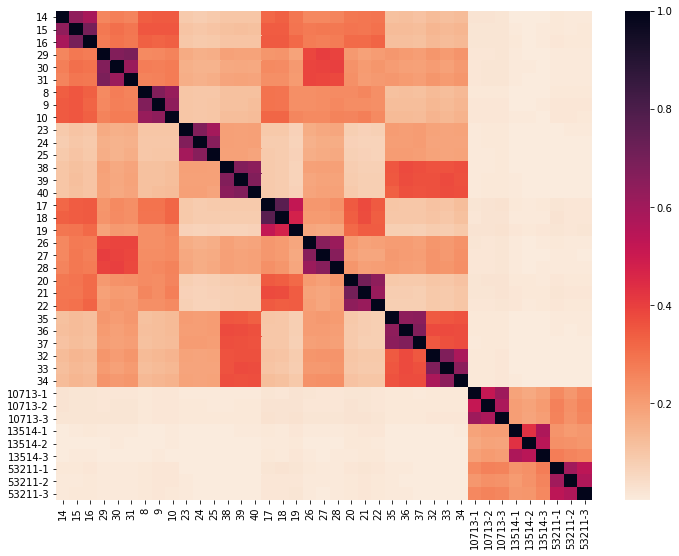

In [12]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, positive mode')
hm = sns.heatmap(dfpos, annot=False, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Sample similarity, negative mode


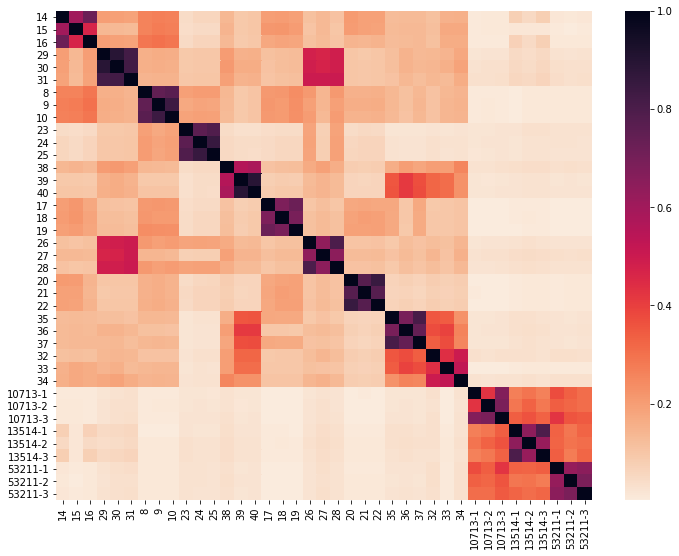

In [13]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, negative mode')
hm = sns.heatmap(dfneg, annot=False, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [14]:
dfpos = pd.DataFrame(sim_pos.label_similarity_jaccard,
                     columns=sim_pos.unique_labels,
                     index=sim_pos.unique_labels)

dfneg = pd.DataFrame(sim_neg.label_similarity_jaccard,
                     columns=sim_neg.unique_labels,
                     index=sim_neg.unique_labels)

Label similarity, positive mode


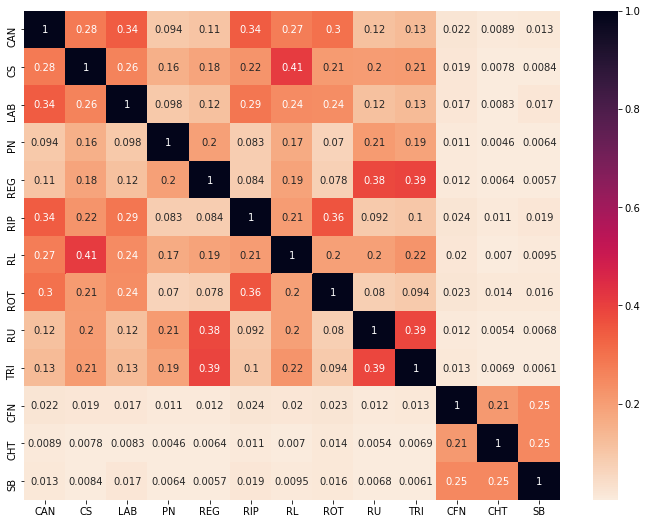

In [15]:
f, ax = plt.subplots(figsize=(12, 9))

print('Label similarity, positive mode')
hm = sns.heatmap(dfpos, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Label similarity, negative mode


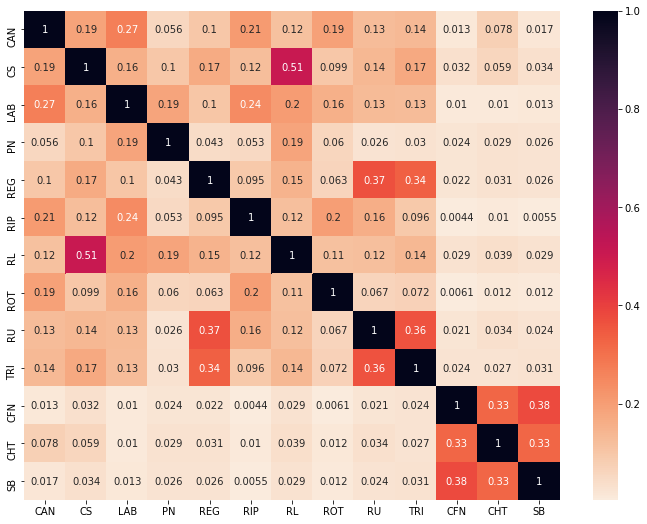

In [16]:
f, ax = plt.subplots(figsize=(12, 9))

print('Label similarity, negative mode')
hm = sns.heatmap(dfneg, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Doing... Experiments with scipy functions...

In [17]:
import scipy.spatial.distance as dist
import scipy.cluster.hierarchy as hier

In [18]:
def df_to_bool(df):
    "Transforms data into 'binary' matrices."
    df = df.copy()
    df[df.notnull()] = 1
    df[df.isnull()] = 0
    return df
aligned_01 = df_to_bool(aligned_all_neg.data)
# confirm it is 0's and 1's
#aligned_01

In [19]:
jdist = dist.pdist(aligned_01.T, metric='jaccard')
print(dist.squareform(jdist))
print('------------------------------------')
sim = mz_similarity(aligned_all_neg)
jsim = sim.sample_similarity_jaccard
jdist = 1 - jsim
print(jdist)

[[0.         0.39789474 0.27368421 ... 0.98458904 0.98819562 0.98148148]
 [0.39789474 0.         0.53263158 ... 0.98924731 0.99367089 0.98951782]
 [0.27368421 0.53263158 0.         ... 0.98852772 0.98867925 0.98499062]
 ...
 [0.98458904 0.98924731 0.98852772 ... 0.         0.37368421 0.34736842]
 [0.98819562 0.99367089 0.98867925 ... 0.37368421 0.         0.31052632]
 [0.98148148 0.98951782 0.98499062 ... 0.34736842 0.31052632 0.        ]]
------------------------------------
[[0.         0.39789474 0.27368421 ... 0.98458904 0.98819562 0.98148148]
 [0.39789474 0.         0.53263158 ... 0.98924731 0.99367089 0.98951782]
 [0.27368421 0.53263158 0.         ... 0.98852772 0.98867925 0.98499062]
 ...
 [0.98458904 0.98924731 0.98852772 ... 0.         0.37368421 0.34736842]
 [0.98819562 0.99367089 0.98867925 ... 0.37368421 0.         0.31052632]
 [0.98148148 0.98951782 0.98499062 ... 0.34736842 0.31052632 0.        ]]


## Wrapping up in a function...

In [20]:
def clustermap_peak_list(aligned):
    aligned_01 = aligned.data.copy()
    aligned_01[aligned_01.notnull()] = 1
    aligned_01[aligned_01.isnull()] = 0
    
    ulabels = aligned.unique_labels()
    n = len(ulabels)
    
    p = sns.color_palette() + sns.color_palette("Set1", n_colors=n-10, desat=.5)
    sample_to_labels = pd.Series(aligned.labels, index=aligned.sample_names)
    label_colors = pd.Series(p, index=ulabels)
    sample_colors = sample_to_labels.map(label_colors)
    
    g = sns.clustermap(aligned_01, metric="jaccard", figsize=(15, 20), 
                       row_cluster=False,
                       col_colors=sample_colors,
                       yticklabels=False)
    # fix bug in seaborn, error in clustermap if cbar == False
    ax=g.cax; aax=ax.clear(); aax = ax.axis('off'); 

    # draw legend
    lpatches = [mpatches.Patch(color=c, label=lbl) for (lbl, c) in label_colors.iteritems()]
    leg = plt.legend(handles=lpatches, fontsize=20)
    return g
    

Sample HC, NEGATIVE mode


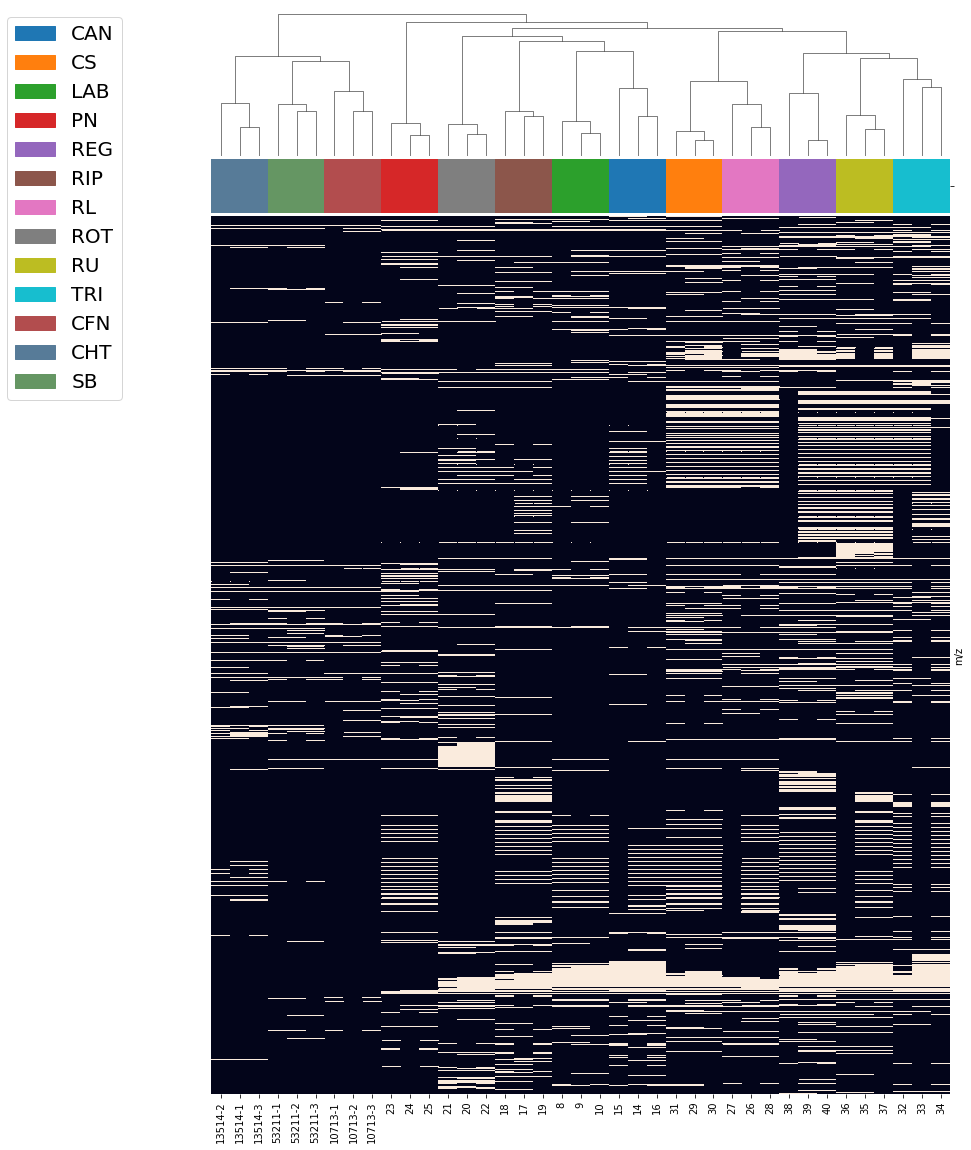

In [21]:
print('Sample HC, NEGATIVE mode')
g = clustermap_peak_list(aligned_all_neg)
g.savefig('sampleHC_negative.pdf')

Sample HC, POSITIVE mode


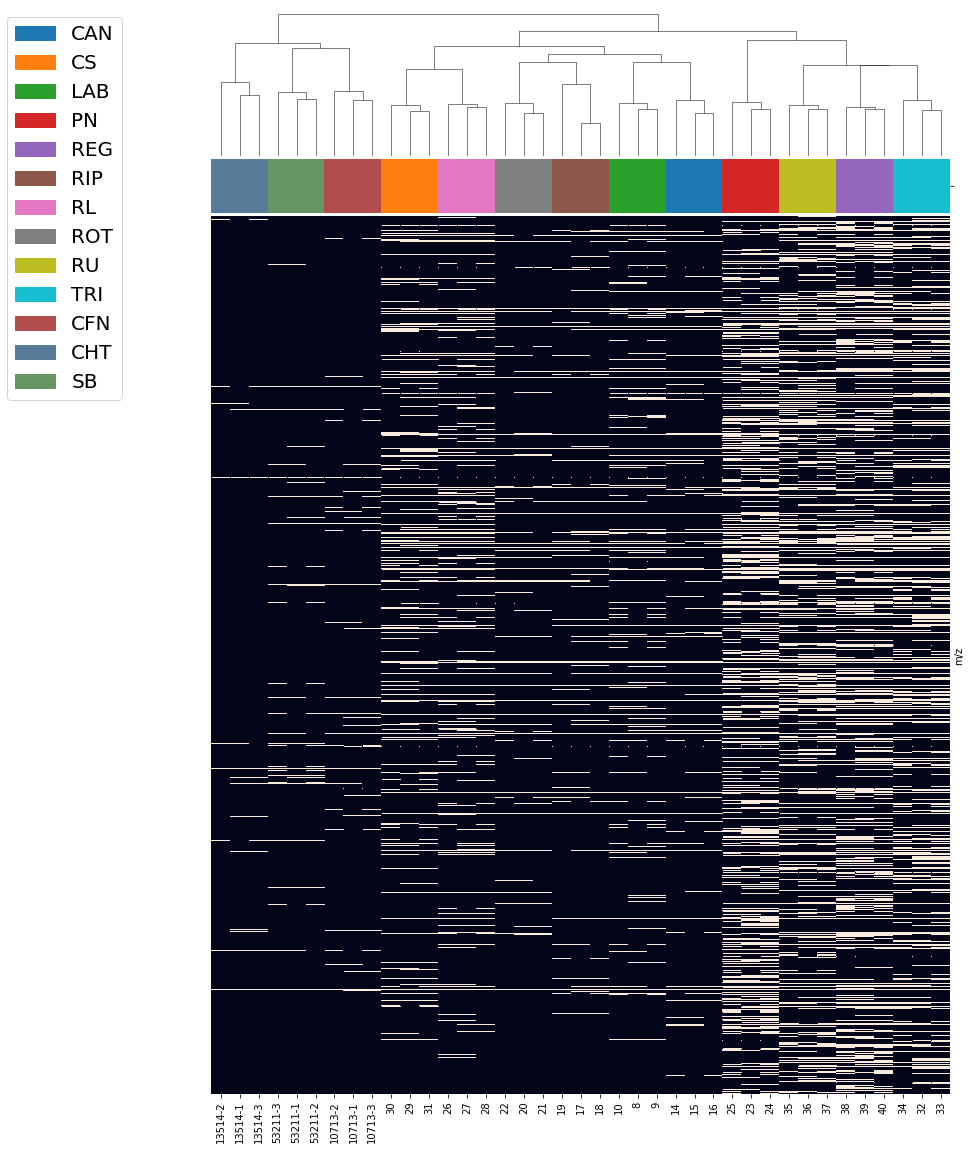

In [22]:
print('Sample HC, POSITIVE mode')
g = clustermap_peak_list(aligned_all_pos)
g.savefig('sampleHC_positive.pdf')

Cultivar dendogram, Jaccard distance, NEGATIVE MODE


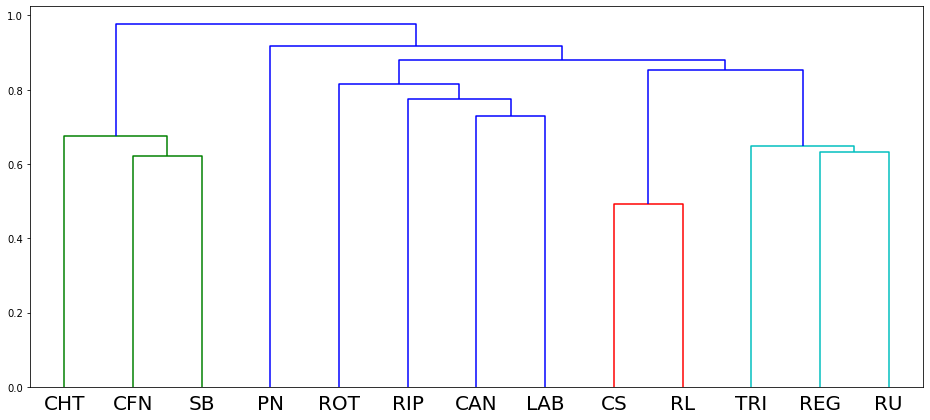

In [23]:
print('Cultivar dendogram, Jaccard distance, NEGATIVE MODE')
jdist = dist.squareform(1 - sim_neg.label_similarity_jaccard)
Z = hier.linkage(jdist, method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z, labels=sim_neg.unique_labels,
                     leaf_font_size=20,
                     above_threshold_color='b')
fig.savefig('dendo_cultivars_jaccard_negative.pdf')

In [24]:
print(hier.cophenet(Z,jdist)[0])

0.9602064578870853


Cultivar dendogram, Jaccard distance, POSITIVE MODE


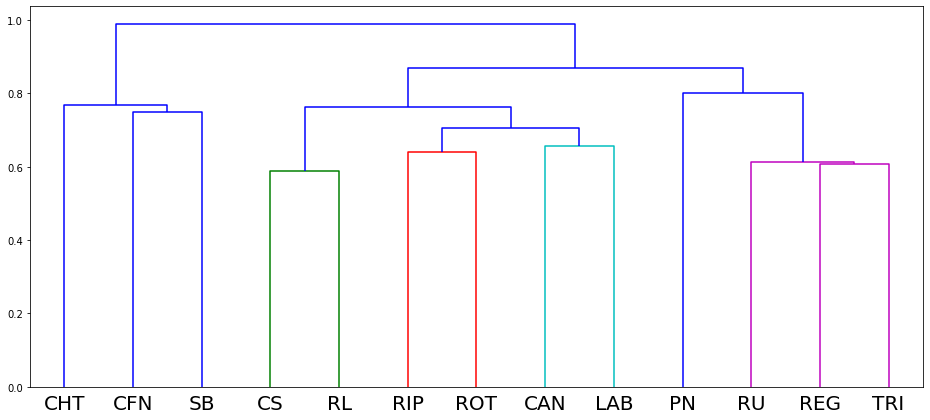

In [25]:
print('Cultivar dendogram, Jaccard distance, POSITIVE MODE')
jdist = dist.squareform(1 - sim_pos.label_similarity_jaccard)
Z = hier.linkage(jdist, method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z, labels=sim_pos.unique_labels,
                     leaf_font_size=20,
                     above_threshold_color='b')
fig.savefig('dendo_cultivars_jaccard_positive.pdf')

In [26]:
print(hier.cophenet(Z,jdist)[0])

0.9685118072327326


### Other Binary Similarity Analysis Methods

In [27]:
aligned_neg = df_to_bool(aligned_all_neg.data)
aligned_pos = df_to_bool(aligned_all_pos.data)

Creating the colours label for all dendrograms (negative and positive have the same labels):

In [28]:
label_colors = {}
colours = cm.get_cmap('nipy_spectral', 13)
col_lbl = colours(range(13))
for i in range(len(col_lbl)):
    label_colors[aligned_all_neg.labels[3*i]] = col_lbl[i]

Cultivar dendogram, Binary methods, NEGATIVE MODE


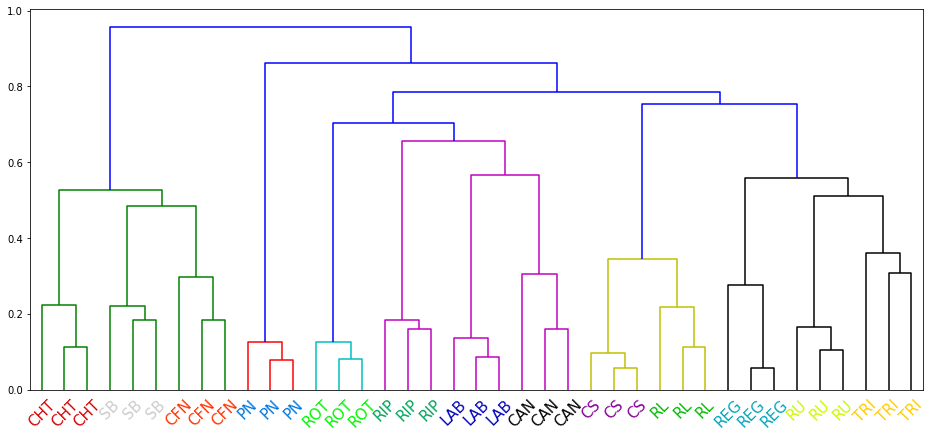

In [29]:
#Apply one of the following: dice, hamming, jaccard, rogerstanimoto, sokalmichener, sokalsneath, yule, kulsinski, rusellrao.

print('Cultivar dendogram, Binary methods, NEGATIVE MODE')
Zdice_neg = hier.linkage(aligned_neg.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_neg, labels=aligned_all_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

Cultivar dendogram, Binary methods, POSITIVE MODE


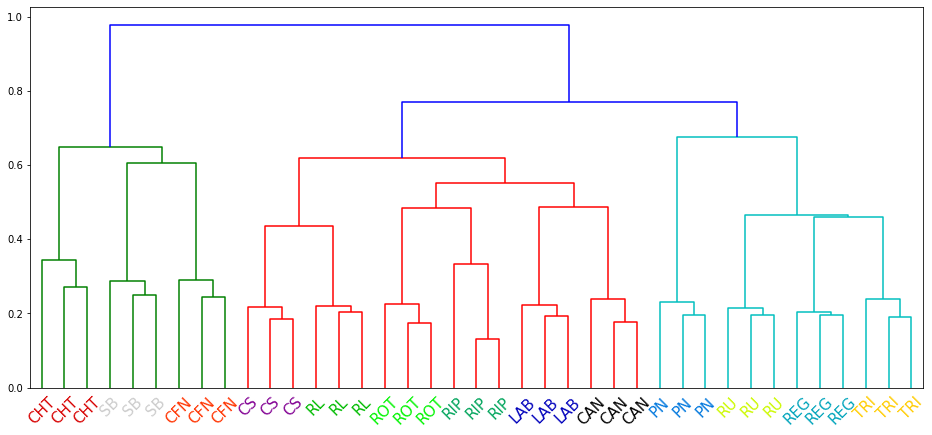

In [30]:
print('Cultivar dendogram, Binary methods, POSITIVE MODE')
Zdice_pos = hier.linkage(aligned_pos.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_pos, labels=aligned_all_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

### Non-binary Similarity Analysis

All samples need to have missing value imputation (removing features is optional) with the function NaN_Imputation of scaling.py (replace missing features with half of the minimum intensity of the full dataset).

After that, the rest of the data processing can vary where 3 different processing emthods were applied in different combinations:

##### Normalization by a references feature (Norm_feat from scaling.py) - N;
##### Glog transformation/ log2 transformation (glog from scaling.py) - G;
##### Pareto Scaling (ParetoScal from scaling.py) - P.
Three combinations were used and compared: 1) Only Pareto Scaling (P), Normalization by a reference feature and Pareto Scaling (NP) and Normalization by a reference feature, glog transformation and Pareto Scaling (NGP).

In [31]:
import scaling as sca
import numpy as np

#### Negative Mode - Original peak alignment

3 types of processing:

Euc_P_neg - Missing Value Imputation and Pareto Scaling.

Euc_NP_neg - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_NGP_neg - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [32]:
#Euc_P_neg
Imputated_neg = sca.NaN_Imputation(aligned_all_neg, 0)
Euc_P_neg = sca.ParetoScal(Imputated_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation and Pareto Scaling


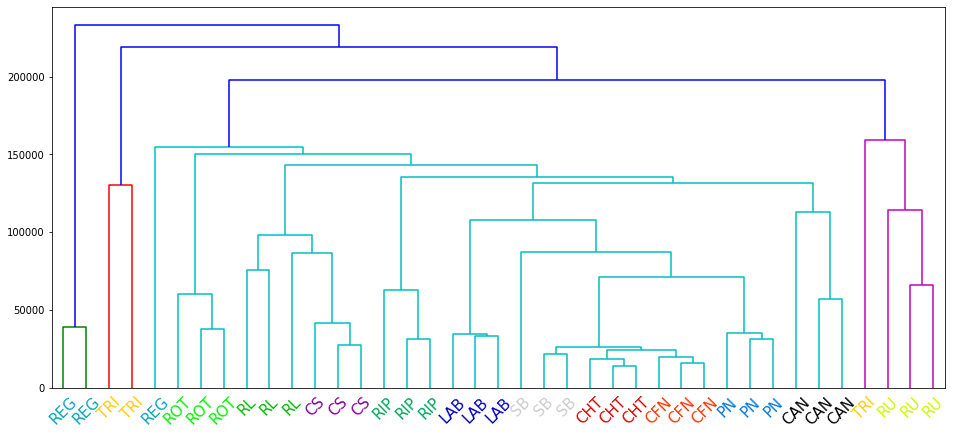

In [33]:
#Measure Euclidean distances
dist_euc_P_neg = dist.pdist(Euc_P_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation and Pareto Scaling')
Z_euc_P_neg = hier.linkage(dist_euc_P_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_P_neg, labels=Euc_P_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [34]:
#Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
print(hier.cophenet(Z_euc_P_neg,dist_euc_P_neg)[0]) #method average seems to lead to higher coefficients

0.9395827078210798


In [35]:
#Euc_NP_neg
#Theoretical mass for negative mode Leucine Enkephalin - 554.2615.
RefEst_Neg = sca.search_for_ref_feat(aligned_all_neg, 554.2615) #see if the function gives the reference feature
print(RefEst_Neg) #It did!

(554.26202, 0.0005200000000513683)


In [36]:
Norm_neg = sca.Norm_Feat(Imputated_neg, 554.26202)
Euc_NP_neg = sca.ParetoScal(Norm_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized and Pareto Scaling


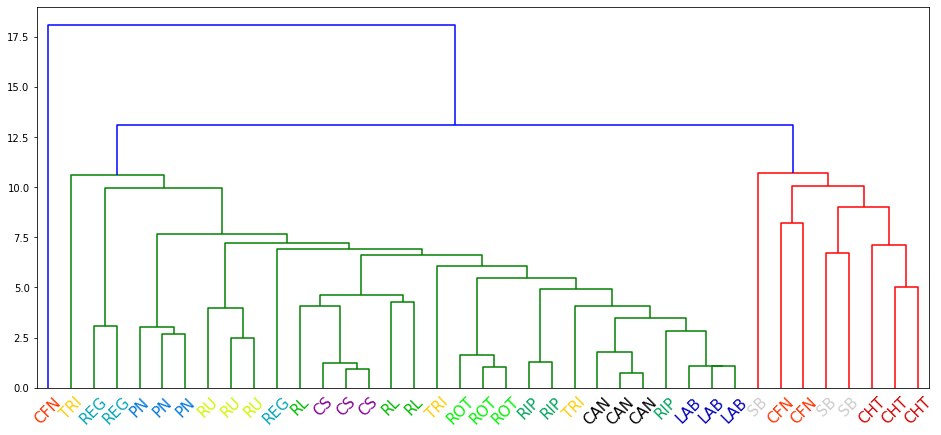

In [37]:
#Measure Euclidean distances
dist_euc_NP_neg = dist.pdist(Euc_NP_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_NP_neg = hier.linkage(dist_euc_NP_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NP_neg, labels=Euc_NP_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [38]:
print(hier.cophenet(Z_euc_NP_neg,dist_euc_NP_neg)[0]) 

0.8866283448501262


In [39]:
#Euc_NGP_neg
glog_neg = sca.glog(Norm_neg, 0)
Euc_NGP_neg = sca.ParetoScal(glog_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling


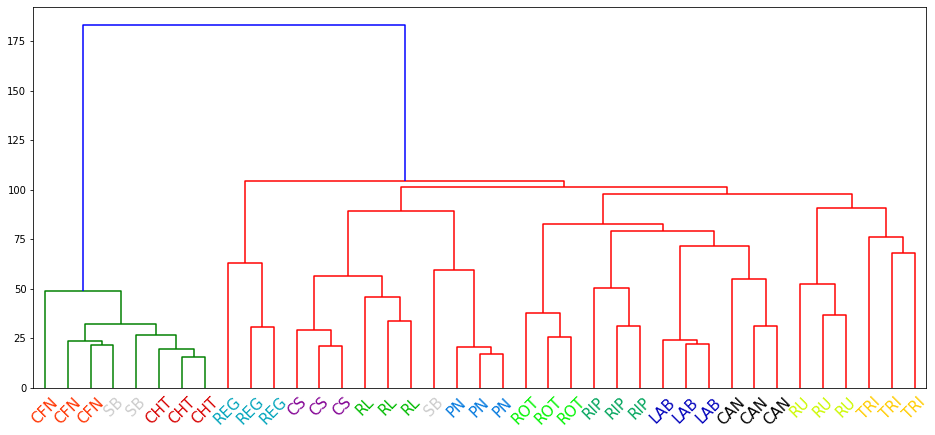

In [40]:
#Measure Euclidean distances
dist_euc_NGP_neg = dist.pdist(Euc_NGP_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_NGP_neg = hier.linkage(dist_euc_NGP_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NGP_neg, labels=Euc_NGP_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [41]:
print(hier.cophenet(Z_euc_NGP_neg,dist_euc_NGP_neg)[0]) 

0.907201350578213


Negative mode (features must be present in 2/3 sample) - doesn't work quite as well, original data already had features removed by other method)

In [42]:
Imputated2_neg = sca.NaN_Imputation(aligned_all_neg, 2/3)
Scaled2_neg = sca.ParetoScal(Imputated2_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE


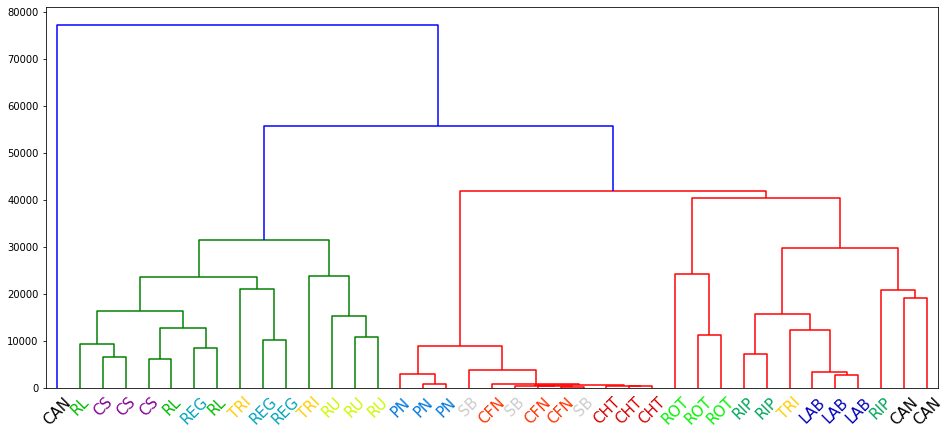

In [43]:
#Measure Euclidean distances
dist2_neg = dist.pdist(Scaled2_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE')
Zneg2 = hier.linkage(dist2_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zneg2, labels=Scaled2_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [44]:
print(hier.cophenet(Zneg2,dist2_neg)[0])

0.8472982312778997


#### Positive Mode - Original peak alignment

3 types of processing:

Euc_P_pos - Missing Value Imputation and Pareto Scaling.

Euc_NP_pos - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_NGP_pos - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [45]:
#Euc_P_pos
Imputated_pos = sca.NaN_Imputation(aligned_all_pos, 0)
Euc_P_pos = sca.ParetoScal(Imputated_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation and Pareto Scaling


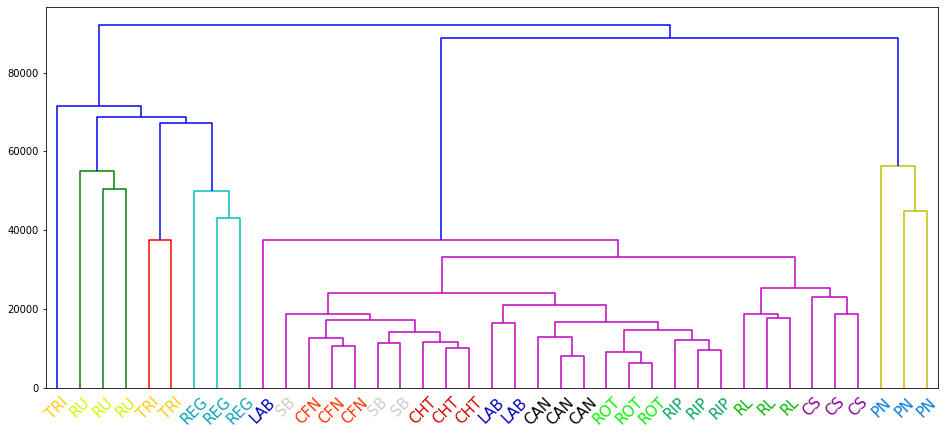

In [46]:
#Measure Euclidean distances
dist_euc_P_pos = dist.pdist(Euc_P_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation and Pareto Scaling')
Z_euc_P_pos = hier.linkage(dist_euc_P_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_P_pos, labels=Euc_P_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [47]:
print(hier.cophenet(Z_euc_P_pos,dist_euc_P_pos)[0])

0.9801271826154482


In [48]:
#Euc_NP_pos
#Theoretical mass for positive mode Leucine Enkephalin - 556.2771.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_pos, 556.2771)
print(RefEst_Pos)

(556.2765712820513, 0.0005287179486686)


In [49]:
Norm_pos = sca.Norm_Feat(Imputated_pos, 556.2765712820513)
Euc_NP_pos = sca.ParetoScal(Norm_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized and Pareto Scaling


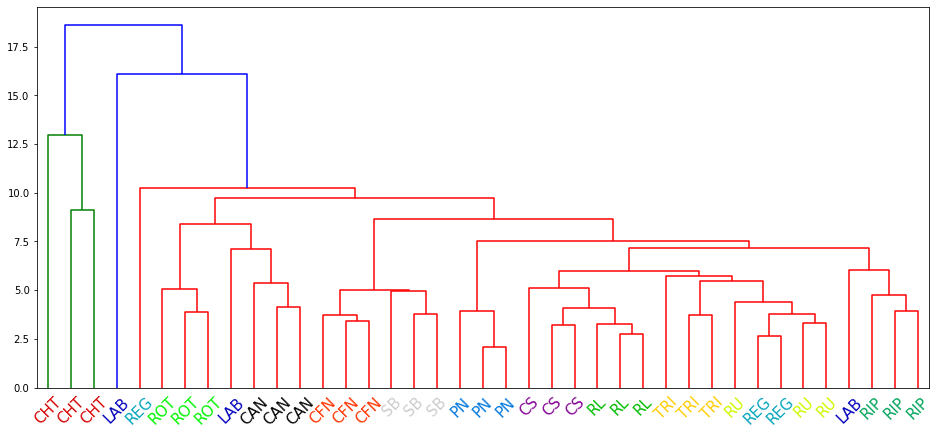

In [50]:
#Measure Euclidean distances
dist_euc_NP_pos = dist.pdist(Euc_NP_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_NP_pos = hier.linkage(dist_euc_NP_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NP_pos, labels=Euc_NP_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [51]:
print(hier.cophenet(Z_euc_NP_pos,dist_euc_NP_pos)[0])

0.8834553769498935


In [52]:
#Euc_NGP_pos
glog_pos = sca.glog(Norm_pos, 0)
Euc_NGP_pos = sca.ParetoScal(glog_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling


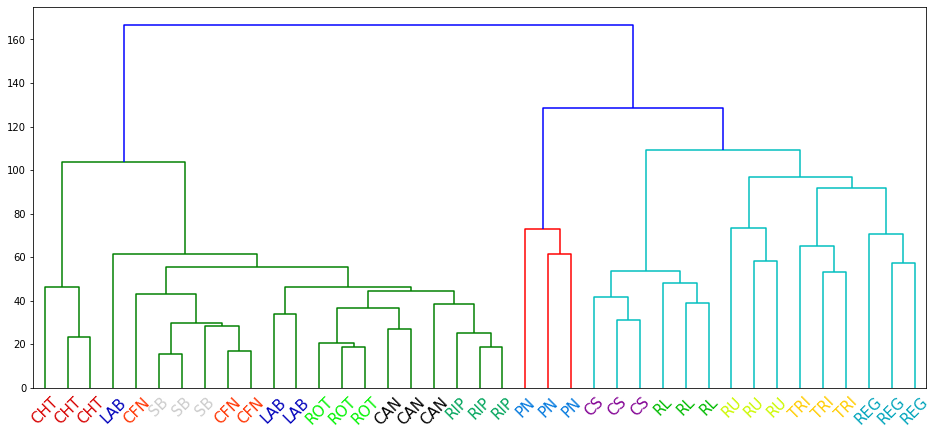

In [53]:
#Measure Euclidean distances
dist_euc_NGP_pos = dist.pdist(Euc_NGP_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_NGP_pos = hier.linkage(dist_euc_NGP_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NGP_pos, labels=Euc_NGP_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [54]:
print(hier.cophenet(Z_euc_NGP_pos,dist_euc_NGP_pos)[0])

0.7975724146805668


#### Negative Mode - Peak alignment (requires a feature to be present in at least all samples of a variety)

Same procedure as before:

3 types of processing:

Euc_P_neg2 (in script, 3_3 in figures) - Missing Value Imputation and Pareto Scaling.

Euc_NP_neg2 (in script, 3_3 in figures) - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_NGP_neg2 (in script, 3_3 in figures) - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [55]:
aligned_all_pos2 = read_aligned_spectra('aligned_1ppm_min3-3_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg2 = read_aligned_spectra('aligned_1ppm_min3-3_1ppm_negative.csv', labels=True, sep=',')

In [56]:
#Euc_P_neg2
Imputated_neg2 = sca.NaN_Imputation(aligned_all_neg2, 0)
Euc_P_neg2 = sca.ParetoScal(Imputated_neg2)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 3-3, NaN Imputation and Pareto Scaling


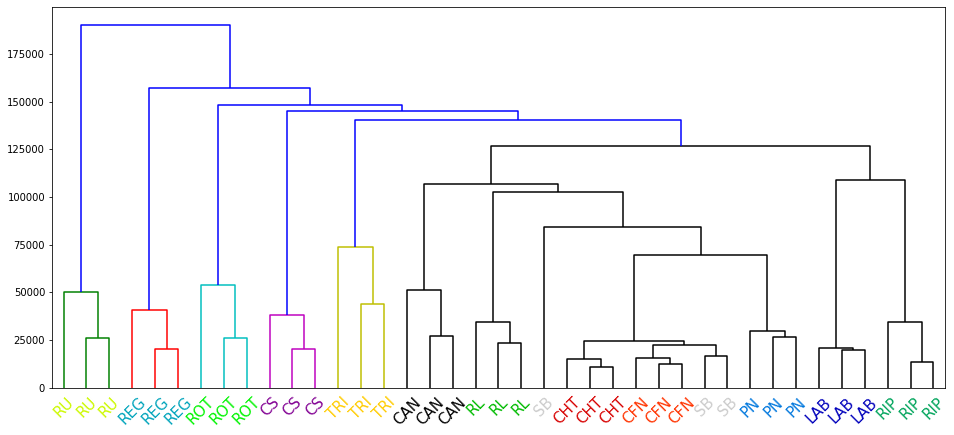

In [57]:
#Measure Euclidean distances
dist_euc_P_neg2 = dist.pdist(Euc_P_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 3-3, NaN Imputation and Pareto Scaling')
Z_euc_P_neg2 = hier.linkage(dist_euc_P_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_P_neg2, labels=Euc_P_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [58]:
print(hier.cophenet(Z_euc_P_neg2,dist_euc_P_neg2)[0]) 

0.8958714963694845


In [59]:
#Euc_NP_neg2
#Theoretical mass for negative mode Leucine Enkephalin - 554.2615.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_neg2, 554.2615)
print(RefEst_Pos) #Same result as previous alignment.
Norm_neg2 = sca.Norm_Feat(Imputated_neg2, 554.26202)
Euc_NP_neg2 = sca.ParetoScal(Norm_neg2)

(554.26202, 0.0005200000000513683)


Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 3-3, NaN Imputation, Normalized and Pareto Scaling


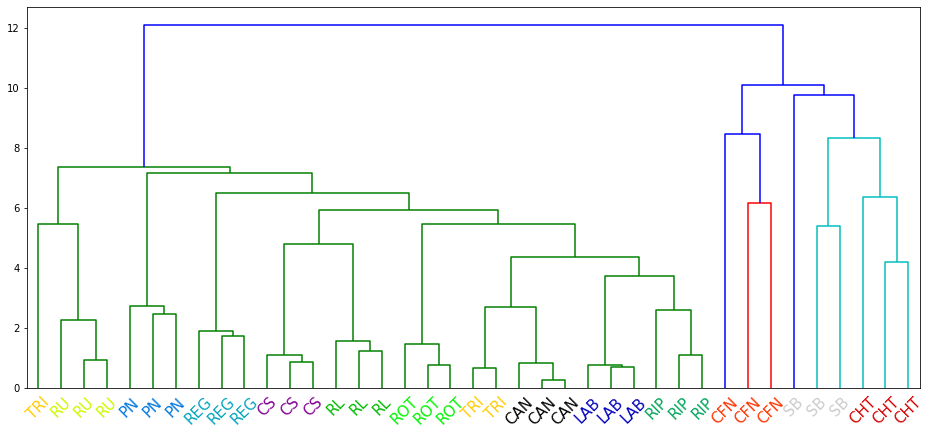

In [60]:
#Measure Euclidean distances
dist_euc_NP_neg2 = dist.pdist(Euc_NP_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 3-3, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_NP_neg2 = hier.linkage(dist_euc_NP_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NP_neg2, labels=Euc_NP_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [61]:
print(hier.cophenet(Z_euc_NP_neg2,dist_euc_NP_neg2)[0])

0.8736708413440388


In [62]:
#Euc_NGP_neg2
glog_neg2 = sca.glog(Norm_neg2, 0)
Euc_NGP_neg2 = sca.ParetoScal(glog_neg2)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 3-3, NaN Imputation, Normalized, Transformed and Pareto Scaling


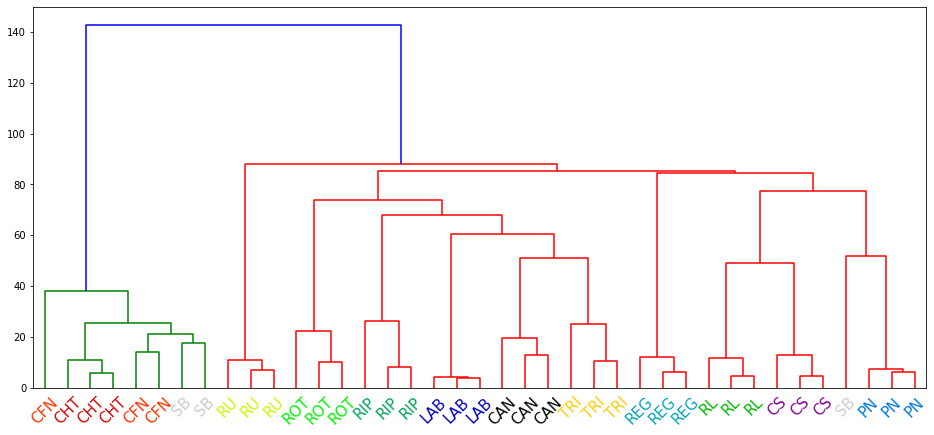

In [63]:
#Measure Euclidean distances
dist_euc_NGP_neg2 = dist.pdist(Euc_NGP_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 3-3, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_NGP_neg2 = hier.linkage(dist_euc_NGP_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NGP_neg2, labels=Euc_NGP_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [64]:
print(hier.cophenet(Z_euc_NGP_neg2,dist_euc_NGP_neg2)[0]) #method average seems to lead to higher coefficients

0.9070552152311473


#### Positive Mode - Peak alignment (requires a feature to be present in at least all samples of a variety)

Same procedure as before:

3 types of processing:

Euc_P_pos2 (in script, 3_3 in figures) - Missing Value Imputation and Pareto Scaling.

Euc_NP_pos2 (in script, 3_3 in figures) - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_NGP_pos2 (in script, 3_3 in figures) - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling

In [65]:
#Euc_P_pos2
Imputated_pos2 = sca.NaN_Imputation(aligned_all_pos2, 0)
Euc_P_pos2 = sca.ParetoScal(Imputated_pos2)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 3-3, NaN Imputation and Pareto Scaling


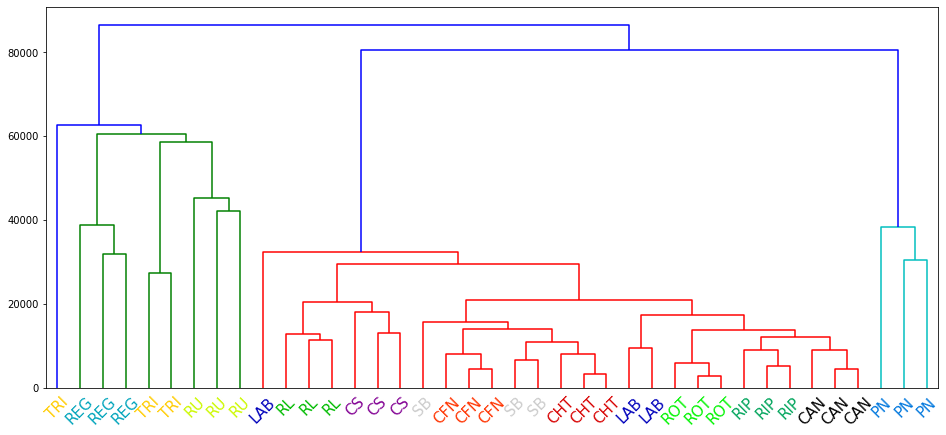

In [66]:
#Measure Euclidean distances
dist_euc_P_pos2 = dist.pdist(Euc_P_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 3-3, NaN Imputation and Pareto Scaling')
Z_euc_P_pos2 = hier.linkage(dist_euc_P_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_P_pos2, labels=Euc_P_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [67]:
print(hier.cophenet(Z_euc_P_pos2,dist_euc_P_pos2)[0])

0.9775161856391127


In [68]:
#Euc_NP_pos2
#Theoretical mass for positive mode Leucine Enkephalin - 556.2771.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_pos, 556.2771)
print(RefEst_Pos) #Same result as previous alignment.
Norm_pos2 = sca.Norm_Feat(Imputated_pos2, 556.2765712820513)
Euc_NP_pos2 = sca.ParetoScal(Norm_pos2)

(556.2765712820513, 0.0005287179486686)


Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 3-3, NaN Imputation, Normalized and Pareto Scaling


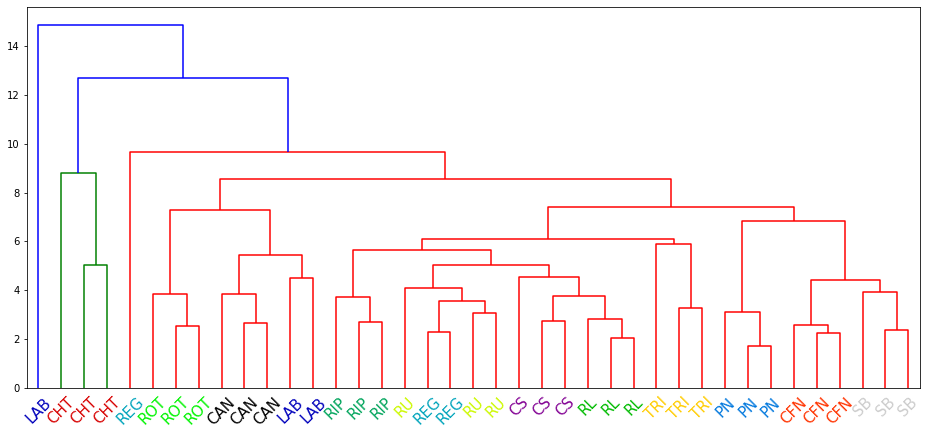

In [69]:
#Measure Euclidean distances
dist_euc_NP_pos2 = dist.pdist(Euc_NP_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 3-3, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_NP_pos2 = hier.linkage(dist_euc_NP_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NP_pos2, labels=Euc_NP_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [70]:
print(hier.cophenet(Z_euc_NP_pos2,dist_euc_NP_pos2)[0])

0.854535789908618


In [71]:
#Euc_NGP_pos
glog_pos2 = sca.glog(Norm_pos2, 0)
Euc_NGP_pos2 = sca.ParetoScal(glog_pos2)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 3-3, NaN Imputation, Normalized, Transformed and Pareto Scaling


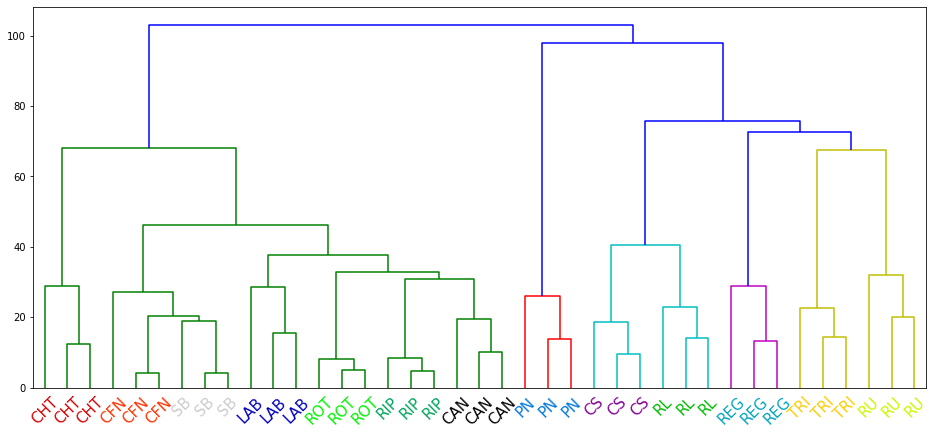

In [72]:
#Measure Euclidean distances
dist_euc_NGP_pos2 = dist.pdist(Euc_NGP_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 3-3, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_NGP_pos2 = hier.linkage(dist_euc_NGP_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NGP_pos2, labels=Euc_NGP_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [73]:
print(hier.cophenet(Z_euc_NGP_pos2,dist_euc_NGP_pos2)[0])

0.8188875629809251


### Comparing Dendrograms

#### Two methods so far: Baker's Gamma Correlation and Cophenetic Correlation Coefficient

#### Examples of procedure with these methods

In [74]:
import numpy as np
import scipy.stats as stats
import multianalysis as ma

#### Baker's method

Use of the mergerank function from multianalysis to create a 'rank' of the iteration number two samples were linked to the same cluster.

In [75]:
euclidean = (Z_euc_P_neg, Z_euc_NP_neg, Z_euc_NGP_neg, Z_euc_P_pos, Z_euc_NP_pos, Z_euc_NGP_pos,
            Z_euc_P_neg2, Z_euc_NP_neg2, Z_euc_NGP_neg2, Z_euc_P_pos2, Z_euc_NP_pos2, Z_euc_NGP_pos2)
dist_euclidean = (dist_euc_P_neg, dist_euc_NP_neg, dist_euc_NGP_neg, dist_euc_P_pos, dist_euc_NP_pos, dist_euc_NGP_pos,
                 dist_euc_P_neg2, dist_euc_NP_neg2, dist_euc_NGP_neg2, dist_euc_P_pos2, dist_euc_NP_pos2, dist_euc_NGP_pos2)

K_euc = []
S_euc = []
Coph_euc = []

for i in range(len(euclidean)):
    K_euc.append(ma.mergerank(euclidean[i])) #Mergerank
    S_euc.append(K_euc[i][K_euc[i]!=0]) #Both reshape to a 1D array (needed for spearman correlation) and take out 0's 
    Coph_euc.append(hier.cophenet(euclidean[i], dist_euclidean[i])) #Matrix of Cophenetic distances

#### Examples

According to Original Paper (Stability of Two Hierarchical Grouping Techniques Case 1: Sensitivity to Data Errors)

In [76]:
print('Pair of samples      \tKendall Correlation \tp-value')
print('Euc_P_neg-Euc_NP_neg\t', stats.kendalltau(S_euc[0],S_euc[1])[0], '\t', stats.kendalltau(S_euc[0],S_euc[1])[1])
print('Euc_P_neg-Euc_NGP_neg\t', stats.kendalltau(S_euc[0],S_euc[2])[0], '\t', stats.kendalltau(S_euc[0],S_euc[2])[1])

Pair of samples      	Kendall Correlation 	p-value
Euc_P_neg-Euc_NP_neg	 0.008910399112678775 	 0.6443850761227088
Euc_P_neg-Euc_NGP_neg	 0.10839742231026103 	 3.835245645295581e-08


According to the explanation given in the R package dendextend

In [77]:
print('Pair of samples      \tSpearman Correlation \tp-value')
print('Euc_P_neg-Euc_NP_neg\t', stats.spearmanr(S_euc[0],S_euc[1])[0], '\t', stats.spearmanr(S_euc[0],S_euc[1])[1])
print('Euc_P_neg-Euc_NGP_neg\t', stats.spearmanr(S_euc[0],S_euc[2])[0], '\t', stats.spearmanr(S_euc[0],S_euc[2])[1])

Pair of samples      	Spearman Correlation 	p-value
Euc_P_neg-Euc_NP_neg	 -0.01557548763503229 	 0.5490821254802851
Euc_P_neg-Euc_NGP_neg	 0.12926679353867315 	 5.941307702666646e-07


#### Cophenetic Correlation Coefficient

In [78]:
#Acho que se pode aplicar logo a função np.corrcoef visto os elementos que vêm da função cophenet estão sempre na mesma ordem 
#uns em relação aos outros.

In [79]:
print('Pair of samples      \tPearson Correlation \tp-value')
print('Euc_P_neg-Euc_NP_neg\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[1][1])[0], '\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[1][1])[1])
print('Euc_P_neg-Euc_NGP_neg\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[2][1])[0], '\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[2][1])[1])

Pair of samples      	Pearson Correlation 	p-value
Euc_P_neg-Euc_NP_neg	 0.01886183156068998 	 0.6082152998757421
Euc_P_neg-Euc_NGP_neg	 0.16050307464101154 	 1.1323510379285296e-05


### Comparison of dendrograms made with all binary metrics and euclidean distances 

#### Correlations between all pairs using all 3 methods

In [80]:
#9 binary methods accepted in pdist (scipy.spatial.distances.pdist)
binary = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 'yule', 'kulsinski', 'russellrao')

In [81]:
#Application of all "single" steps needed presented in the examples above with every distance metric.
#Negative mode
Z_neg = []
K_neg = []
S_neg = []
Coph_neg = []

for i in range(len(binary)):
    Z_neg.append(hier.linkage(aligned_neg.T, metric = binary[i], method='average')) #Z
    K_neg.append(ma.mergerank(Z_neg[i])) #Mergerank
    S_neg.append(K_neg[i][K_neg[i]!=0]) #Eliminating 0's
    Coph_neg.append(hier.cophenet(Z_neg[i], dist.pdist(aligned_neg.T, metric = binary[i]))) #Cophenetic

In [82]:
#Positive Mode
Z_pos = []
K_pos = []
S_pos = []
Coph_pos = []

for i in range(len(binary)):
    Z_pos.append(hier.linkage(aligned_pos.T, metric = binary[i], method='average')) #Z
    K_pos.append(ma.mergerank(Z_pos[i])) #Mergerank
    S_pos.append(K_pos[i][K_pos[i]!=0]) #Eliminating 0's
    Coph_pos.append(hier.cophenet(Z_pos[i], dist.pdist(aligned_pos.T, metric = binary[i]))) #Cophenetic

In [83]:
#Creation of a list with all the "rank" values (in order) for the different metrics: 
#Negative Euclideans, Positive Euclideans, Negative Binaries, Positive Binaries
S = []
S.extend(S_euc)
S.extend(S_neg)
S.extend(S_pos)
#Creation of a list with all the returns from the function cophenetic for the different metrics: 
#Negative Euclideans, Positive Euclideans, Negative Binaries, Positive Binaries
Coph = []
Coph.extend(Coph_euc)
Coph.extend(Coph_neg)
Coph.extend(Coph_pos)

Creation of all dataframes needed to store all correlation coeficients and respective p-values fot all three methods

In [84]:
#Column names and row names for the dataframes
colnames = ['euc_P_neg2_1', 'euc_NP_neg2_1', 'euc_NGP_neg2_1', 'euc_P_pos2_1', 'euc_NP_pos2_1', 'euc_NGP_pos2_1','euc_P_neg3_3',
            'euc_NP_neg3_3', 'euc_NGP_neg3_3', 'euc_P_pos3_3', 'euc_NP_pos3_3', 'euc_NGP_pos3_3','dice_neg2_1', 'hamming_neg2_1',
            'jaccard_neg2_1', 'rogerstanimoto_neg2_1', 'sokalmichener_neg2_1', 'sokalsneath_neg2_1','yule_neg2_1', 
            'kulsinski_neg2_1', 'russellrao_neg2_1','dice_pos2_1', 'hamming_pos2_1', 'jaccard_pos2_1', 'rogerstanimoto_pos2_1', 
            'sokalmichener_pos2_1', 'sokalsneath_pos2_1', 'yule_pos2_1', 'kulsinski_pos2_1', 'russellrao_pos2_1']

In [85]:
df_K = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #K - Kendall (Baker)
df_S = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #S - Spearman (Baker)
df_C = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #C - Cophenetic Correlation
df_K_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of K method
df_S_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of S method
df_C_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of C method

In [86]:
#Calculation of correlation coefficient for each method
for i in range(len(S)):
    for j in range(len(S)):
        df_K.iloc[i,j] = stats.kendalltau(S[i],S[j])[0] #Correlation coefficient
        df_S.iloc[i,j] = stats.spearmanr(S[i],S[j])[0] #Correlation coefficient
        df_C.iloc[i,j] = stats.pearsonr(Coph[i][1],Coph[j][1])[0] #Correlation coefficient
        df_K_p.iloc[i,j] = stats.kendalltau(S[i],S[j])[1] #p-value
        df_S_p.iloc[i,j] = stats.spearmanr(S[i],S[j])[1] #p-value
        df_C_p.iloc[i,j] = stats.pearsonr(Coph[i][1],Coph[j][1])[1] #p-value

### Heatmaps of the correlation coeficients for the 3 methods

Baker (Kendall) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


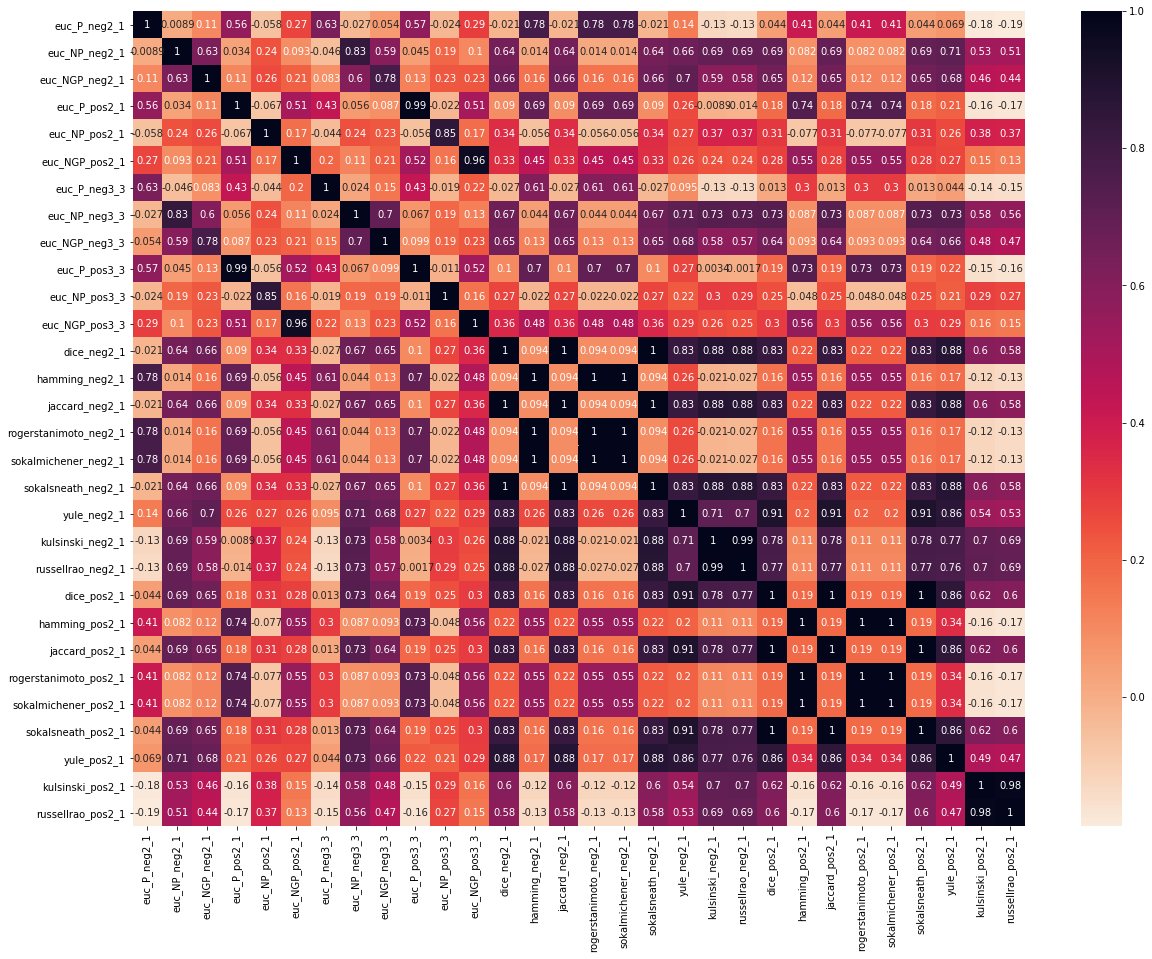

In [87]:
f, ax = plt.subplots(figsize=(20, 15))

print('Baker (Kendall) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
hm = sns.heatmap(df_K, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [88]:
Kendall = pd.DataFrame(np.zeros((9, 5)), index = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 
                                                 'yule', 'kulsinski', 'russellrao'), columns = ('neg2_1', 'pos2_1', 'neg3_3', 
                                                                                                'pos3_3', 'neg+pos'))

for j in range(5):
    for r in range(9):
        if j in [0,2]:
            Kendall.iloc[r,j] = sum(df_K.iloc[12+r,j*3:j*3+3])
        elif j in [1,3]:
            Kendall.iloc[r,j] = sum(df_K.iloc[21+r,j*3:j*3+3])
        else:
            Kendall.iloc[r,j] = sum(Kendall.iloc[r,0:4])
#print(Kendall)

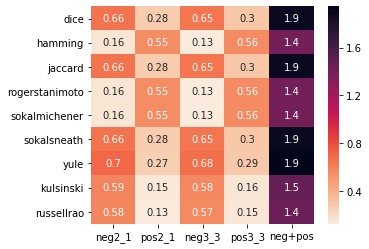

In [89]:
for j in range(5):
    for r in range(9):
        if j in [0,2]:
            Kendall.iloc[r,j] = df_K.iloc[12+r,j*3+2]#sum(df_C.iloc[12+r,j*3+2])j*3:j*3+3])
        elif j in [1,3]:
            Kendall.iloc[r,j] = df_K.iloc[21+r,j*3+2]#sum(df_C.iloc[21+r,j*3+2])j*3:j*3+3])
        else:
            Kendall.iloc[r,j] = sum(Kendall.iloc[r,0:4])
f, ax = plt.subplots(figsize=(5, 4))
hm = sns.heatmap(Kendall, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Baker (Spearman) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


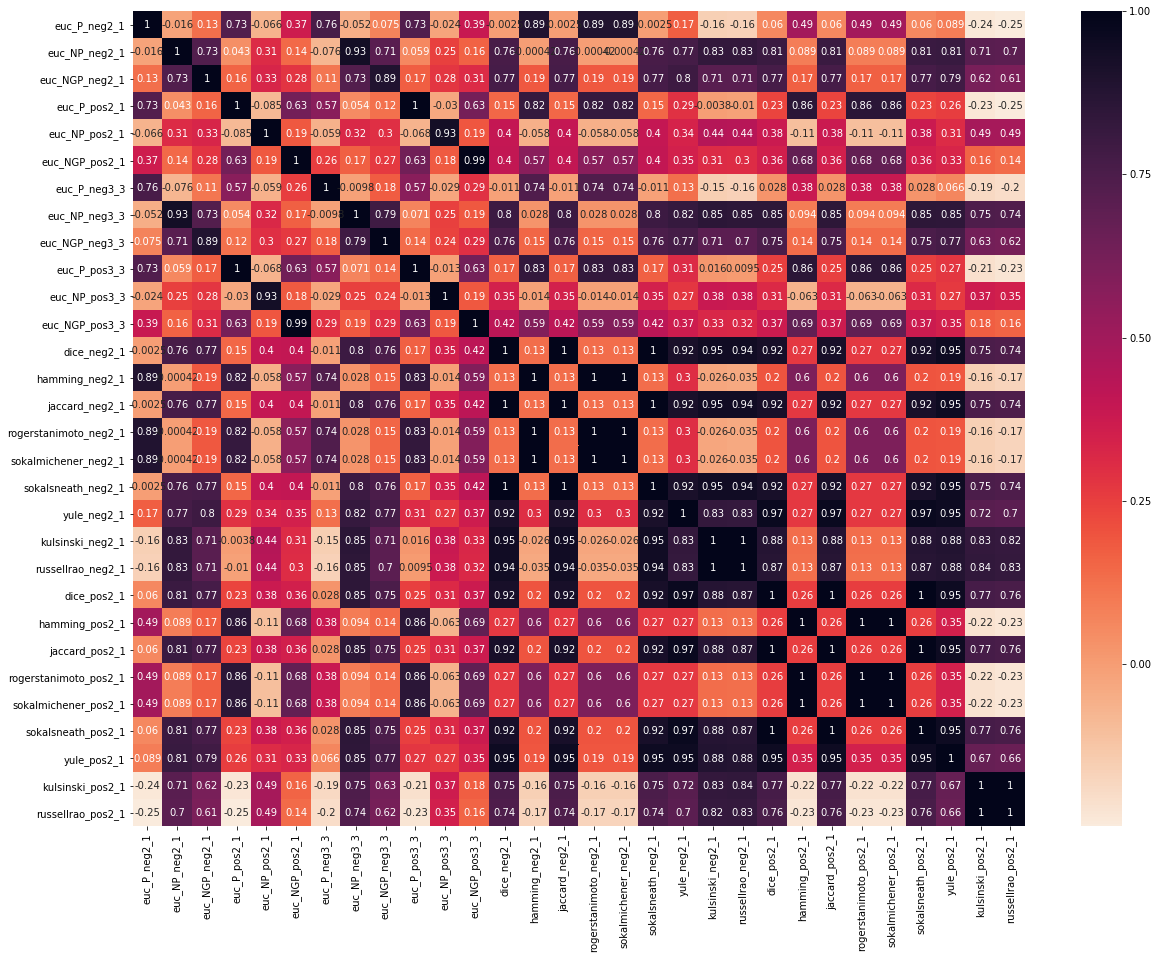

In [90]:
f, ax = plt.subplots(figsize=(20, 15))

print('Baker (Spearman) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
hm = sns.heatmap(df_S, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Cophenetic Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


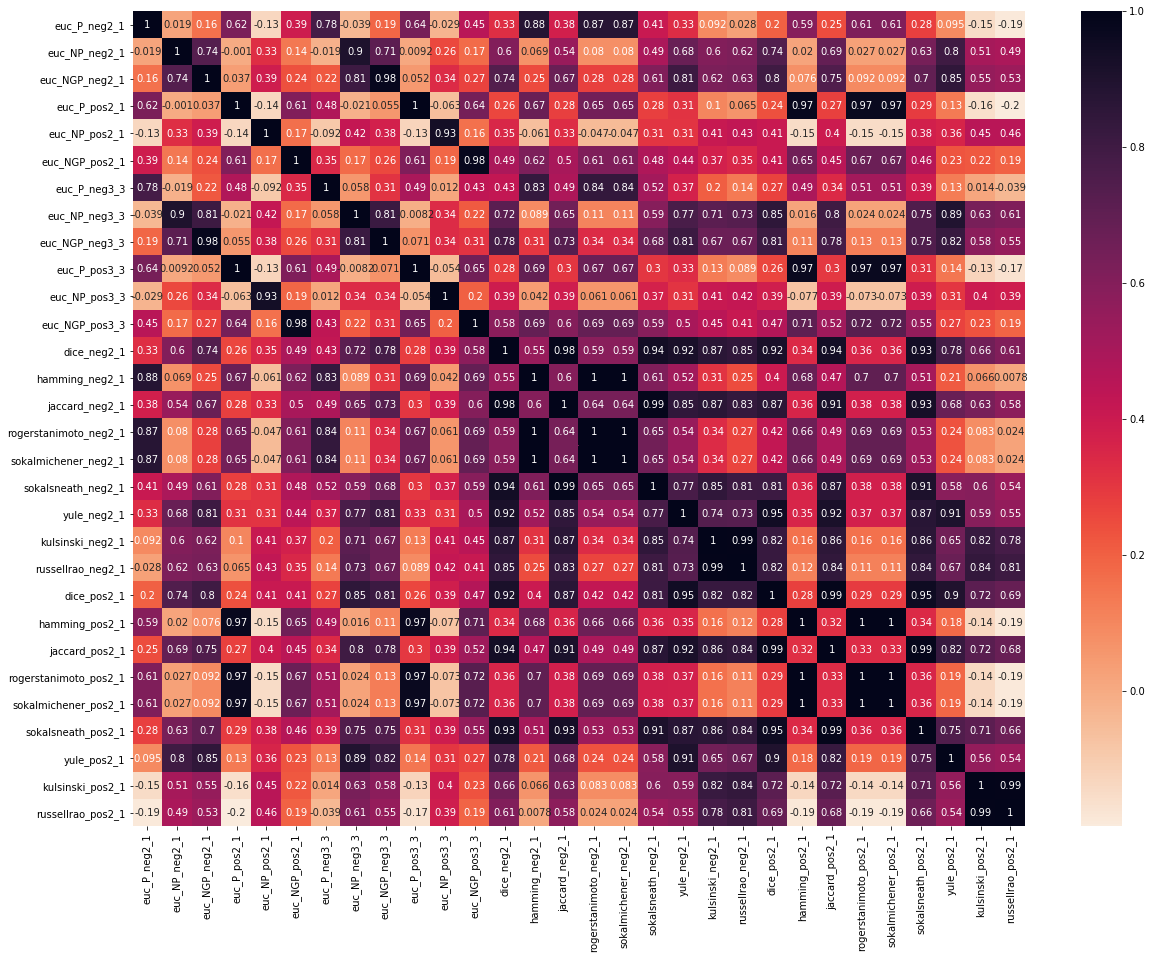

In [91]:
f, ax = plt.subplots(figsize=(20, 15))

print('Cophenetic Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
hm = sns.heatmap(df_C, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [92]:
Cophenetic = pd.DataFrame(np.zeros((9, 5)), index = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 
                                                 'yule', 'kulsinski', 'russellrao'), columns = ('neg2_1', 'pos2_1', 'neg3_3', 
                                                                                                'pos3_3', 'neg+pos'))

for j in range(5):
    for r in range(9):
        if j in [0,2]:
            Cophenetic.iloc[r,j] = sum(df_C.iloc[12+r,j*3:j*3+3])
        elif j in [1,3]:
            Cophenetic.iloc[r,j] = sum(df_C.iloc[21+r,j*3:j*3+3])
        else:
            Cophenetic.iloc[r,j] = sum(Cophenetic.iloc[r,0:4])
#print(Cophenetic)

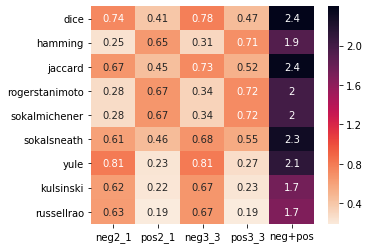

In [93]:
for j in range(5):
    for r in range(9):
        if j in [0,2]:
            Cophenetic.iloc[r,j] = df_C.iloc[12+r,j*3+2]#sum(df_C.iloc[12+r,j*3+2])j*3:j*3+3])
        elif j in [1,3]:
            Cophenetic.iloc[r,j] = df_C.iloc[21+r,j*3+2]#sum(df_C.iloc[21+r,j*3+2])j*3:j*3+3])
        else:
            Cophenetic.iloc[r,j] = sum(Cophenetic.iloc[r,0:4])
f, ax = plt.subplots(figsize=(5, 4))
hm = sns.heatmap(Cophenetic, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Hierarchical clustering of the correlation coeficients of dendrograms made with different distance metrics with each other

Colours for these labels (groups: neg_peakalignment1, pos_peakalignment1, neg_peakalignment2, pos_peakalignment2, neg_binary, pos_binary

In [94]:
label_colors2 = {}
colours2 = cm.get_cmap('nipy_spectral', 6)
col_lbl2 = colours2(range(6))
for i in range(4):
    label_colors2[df_K.columns[3*i]] = col_lbl2[i]
    label_colors2[df_K.columns[3*i+1]] = col_lbl2[i]
    label_colors2[df_K.columns[3*i+2]] = col_lbl2[i]
for i in range(9):
    label_colors2[df_K.columns[12+i]] = col_lbl2[4]
    label_colors2[df_K.columns[21+i]] = col_lbl2[5]

Hierarchical clustering of the Baker (Kendall) Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


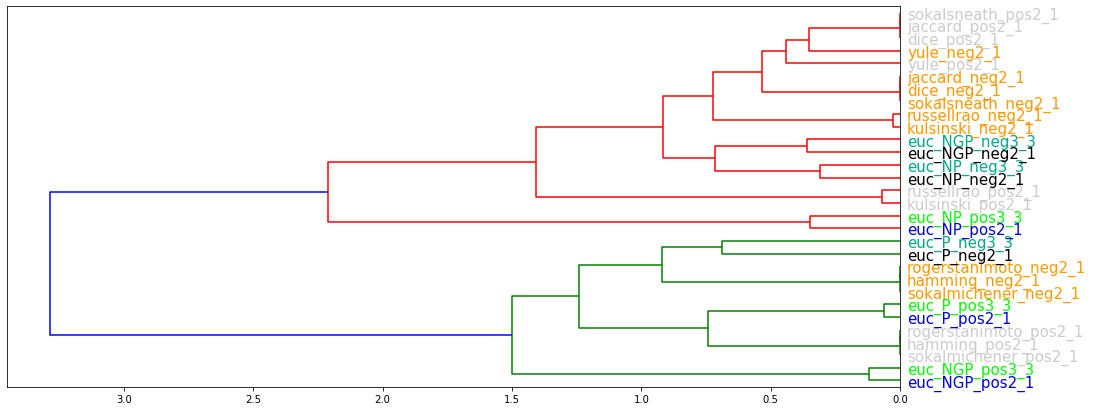

In [95]:
print('Hierarchical clustering of the Baker (Kendall) Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
Z_K = hier.linkage(df_K, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_K, labels=df_K.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

Hierarchical clustering of the Baker (Spearman) Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


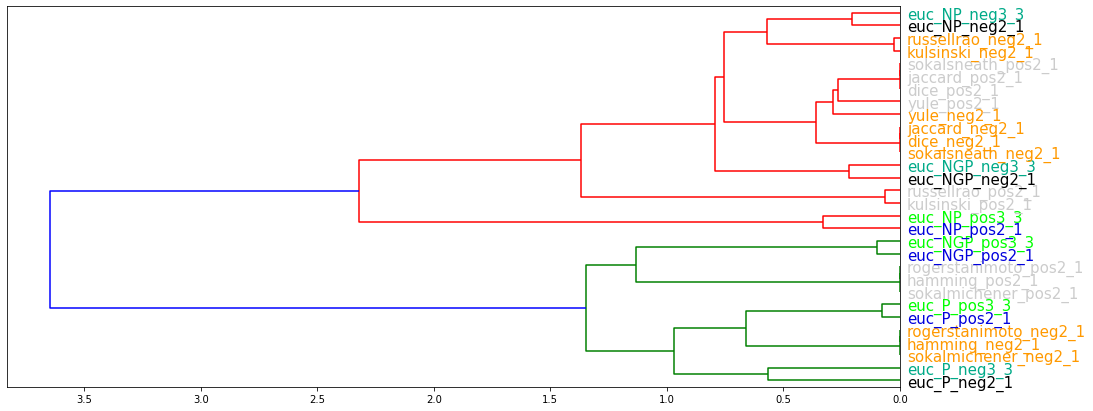

In [96]:
print('Hierarchical clustering of the Baker (Spearman) Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
Z_S = hier.linkage(df_S, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_S, labels=df_S.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

Hierarchical clustering of the Cophenetic Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


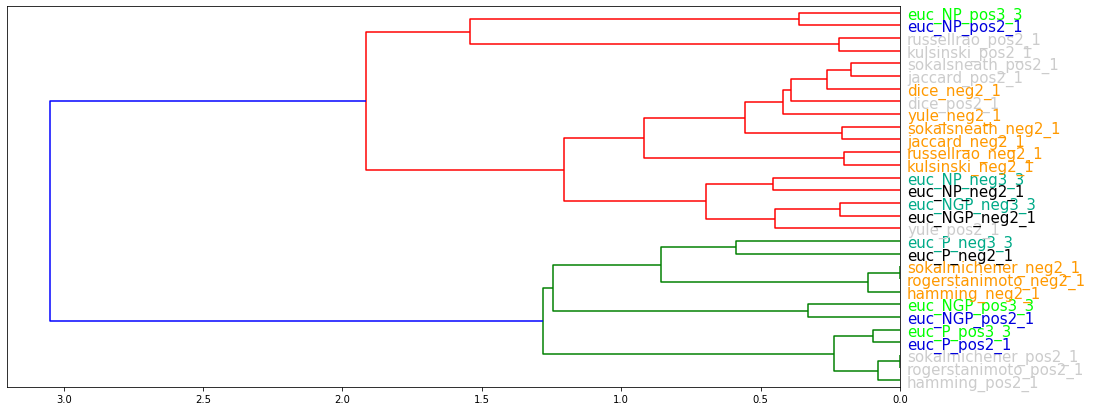

In [97]:
print('Hierarchical clustering of the Cophenetic Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
Z_C = hier.linkage(df_C, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_C, labels=df_C.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

### Distance discrimination of all methods applied (and shown in previous heatmap/dendrogram).

In [98]:
#Preparing Z linkage matrices
Z = []
Z.extend(euclidean)
Z.extend(Z_neg)
Z.extend(Z_pos)

In [99]:
disc_average = np.zeros((1,30))
disc_median = np.zeros((1,30))
disc_correct = np.zeros((1,30))
for i in range(len(Z)):
    discrim = sca.dist_discrim(aligned_all_neg, Z[i], 3, method = 'average')  #all samples have the same order
    disc_average[0,i] = discrim[0]
    disc_median[0,i] = sca.dist_discrim(aligned_all_neg, Z[i], 3, 'median')[0] #all samples have the same order
    correct = np.array(list(discrim[1].values()))
    disc_correct[0,i] = len(correct[correct>0])

disc_average = pd.DataFrame(disc_average, index = ['distances average'], columns = colnames)
disc_median = pd.DataFrame(disc_median, index = ['distances median'], columns = colnames)
disc_correct = pd.DataFrame(disc_correct, index = ['correct groupings'], columns = colnames)

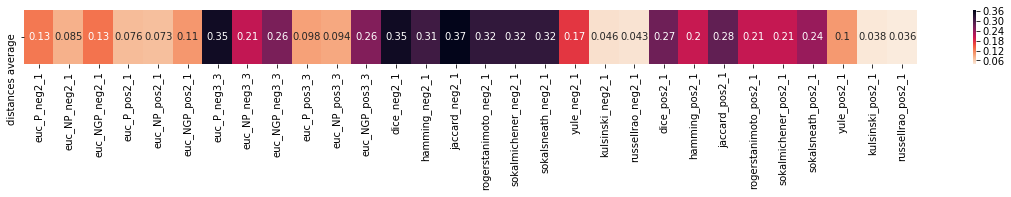

In [100]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_average, annot=True, ax=ax, cmap = sns.cm.rocket_r)

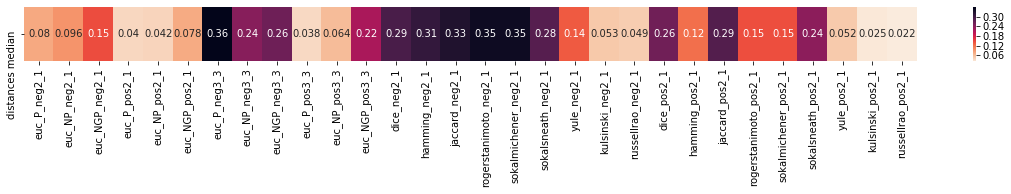

In [101]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_median, annot=True, ax=ax, cmap = sns.cm.rocket_r)

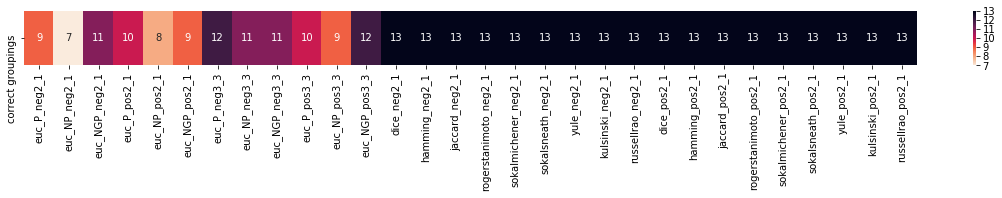

In [102]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_correct, annot=True, ax=ax, cmap = sns.cm.rocket_r)

### K-means clustering

In [103]:
import sklearn.cluster as skclust

#### Example of what happens in a K-means clustering and how samples are separated 
Use of the module do sci-kit learn - sklearn. Cluster number equal to the amount of varieties. How well can this method separate the varieties. Default parameters except number of clusters.

This example doesn't necessarily mirror the results below (for the case in example) since K-means clustering has an intrinsically random side to it and the clustering is performed again for the case example.

In [104]:
Kmean = skclust.KMeans(n_clusters=13)

In [105]:
a = Kmean.fit(Euc_NGP_neg.data.T)

In [106]:
dicto = {}
for i in range(len(a.labels_)):
    if a.labels_[i] in dicto:
        dicto[a.labels_[i]].append(aligned_all_neg.labels[i])
    else:
        dicto[a.labels_[i]] = [aligned_all_neg.labels[i]]
dicto

{9: ['CAN', 'CAN', 'CAN'],
 10: ['CS', 'CS', 'CS'],
 2: ['LAB', 'LAB', 'LAB'],
 7: ['PN', 'PN', 'PN'],
 0: ['REG', 'REG', 'REG'],
 12: ['RIP', 'RIP', 'RIP'],
 3: ['RL', 'RL', 'RL'],
 8: ['ROT', 'ROT', 'ROT'],
 4: ['RU', 'RU', 'RU'],
 6: ['TRI', 'TRI'],
 11: ['TRI'],
 1: ['CFN', 'CFN', 'CFN', 'CHT', 'CHT', 'CHT', 'SB', 'SB'],
 5: ['SB']}

### K-means clustering applied to all euclidean methods and the binary matrixes built

To try and get a condensed and more easily digestible version of the results, a method similar to the discrimination distance performed in the hierarchical clustering was made. The same metrics as before are used.

Replicates of a variety can be together in a cluster but, if there are more samples in the same cluster, its "discrimination distance" is still zero. Therefore, this method is harsher than the original dist_discrim method. The distance is calculated as the distance between the centroid of the cluster where the samples are and the closest centroid. This distance is normalized by dividing it by the maximum distance between any 2 centroids of the clusters formed. The mean/median of the discrimination distances of all groups is then a measure of the global discrimination distance

Use of the Kmeans_discrim function from multianalysis to calculate discrimination distance.

In [107]:
aligned_neg2 = df_to_bool(aligned_all_neg2.data)
aligned_pos2 = df_to_bool(aligned_all_pos2.data)

In [108]:
colnames2 = ['euc_P_neg2_1', 'euc_NP_neg2_1', 'euc_NGP_neg2_1', 'euc_P_pos2_1', 'euc_NP_pos2_1', 'euc_NGP_pos2_1',
             'euc_P_neg3_3', 'euc_NP_neg3_3', 'euc_NGP_neg3_3', 'euc_P_pos3_3', 'euc_NP_pos3_3', 'euc_NGP_pos3_3',
             'aligned_neg2_1', 'aligned_pos2_1','aligned_neg3_3', 'aligned_pos3_3']

In [109]:
euclidean = (Euc_P_neg, Euc_NP_neg, Euc_NGP_neg, Euc_P_pos, Euc_NP_pos, Euc_NGP_pos,
            Euc_P_neg2, Euc_NP_neg2, Euc_NGP_neg2, Euc_P_pos2, Euc_NP_pos2, Euc_NGP_pos2)#, 
binaries = (aligned_neg, aligned_pos, aligned_neg2, aligned_pos2)

In [110]:
from metabolinks import AlignedSpectra

In [111]:
disc_average = np.zeros((1,16))
disc_median = np.zeros((1,16))
disc_correct = np.zeros((1,16))
for i in range(len(euclidean)):
    discrim = ma.Kmeans_discrim(euclidean[i], 3, method = 'average')  #all samples have the same order
    disc_average[0,i] = discrim[0]
    disc_median[0,i] = ma.Kmeans_discrim(euclidean[i], 3, method = 'median')[0] #all samples have the same order
    correct = np.array(list(discrim[1].values()))
    disc_correct[0,i] = len(correct[correct>0])
for i in range(len(binaries)):
    discrim = ma.Kmeans_discrim(AlignedSpectra(binaries[i], labels = aligned_all_neg.labels), 3, method = 'average')
    disc_average[0,12 + i] 
    disc_average[0,12 + i] = discrim[0]
    disc_median[0,12 + i] = ma.Kmeans_discrim(AlignedSpectra(binaries[i], labels = aligned_all_neg.labels), 3, method = 'median')[0] 
    correct = np.array(list(discrim[1].values()))
    disc_correct[0,12 + i] = len(correct[correct>0])

disc_average = pd.DataFrame(disc_average, index = ['distances average'], columns = colnames2)
disc_median = pd.DataFrame(disc_median, index = ['distances median'], columns = colnames2)
disc_correct = pd.DataFrame(disc_correct, index = ['correct groupings'], columns = colnames2)

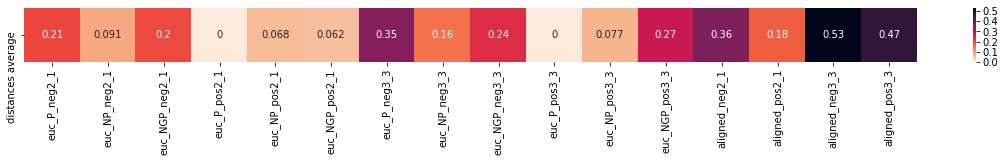

In [112]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_average, annot=True, ax=ax, cmap = sns.cm.rocket_r)

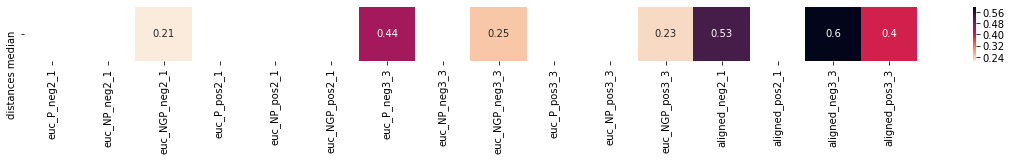

In [113]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_median, annot=True, ax=ax, cmap = sns.cm.rocket_r)

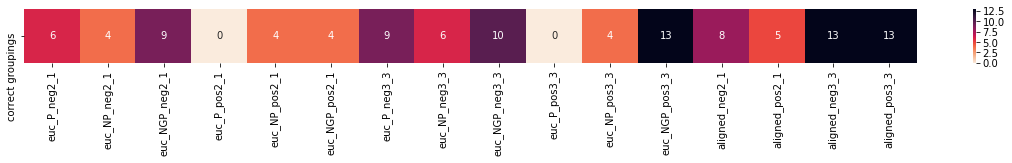

In [114]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_correct, annot=True, ax=ax, cmap = sns.cm.rocket_r)

### RandomForests Attempts - Size of test data 0,1, n_estimators = 200

This section of the notebook takes some time.

In [115]:
#Creation of "binary" Spectras using the binary matrices built with the function df_to_bool.
binary_neg1 = AlignedSpectra(aligned_neg, labels = aligned_all_neg.labels)
binary_neg2 = AlignedSpectra(aligned_neg2, labels = aligned_all_neg2.labels)
binary_pos1 = AlignedSpectra(aligned_pos, labels = aligned_all_pos.labels)
binary_pos2 = AlignedSpectra(aligned_pos2, labels = aligned_all_pos2.labels)

In [116]:
#Preparations of dicts:
Scores = {}
CKS = {}
Imp_feat = {}
Cross_Val = {}

### Attempt/Method nº1 - Direct

### Simple application of random forests

Since the test group is small, the random forest classification is iterated 20 times to make sure more test samples are used and then an average of the results are obtained - number of random forests can be decided by iter_num. This is the same for all methods. 

10% of the samples are randomly chosen to be part of the test group and the rest are used to train the model. CV or cross-validation score is made using all samples and is 3-fold since that is maximum number possible (since every group of samples only has 3 replicates).

To evaluate the results, the score of the random forest "built" is extracted as well as the Cohen's Kappa Score (cks), the order of the average of most important features across the random forests and the cross-validation score.

Now to run the random forests on the different datasets (negative and positive of both alignments) both in their "normal" and "binary" matrices form. For the normal or euclidean matrices, only the data concerning the NGP data processing was used since it was the best performer of all former methods employed.

Application of the function simple_RF from multianalysis.

In [117]:
N1_D = ma.simple_RF(Euc_NGP_neg)#(Scores, Cohen's Kappa Score, order of features based on importances, 3-fold cross-validation)
Scores['neg2-1_direct'] = N1_D[0]
CKS['neg2-1_direct'] = N1_D[1]
Imp_feat['neg2-1_direct'] = N1_D[2]
Cross_Val['neg2-1_direct'] = N1_D[3]

In [118]:
P1_D = ma.simple_RF(Euc_NGP_pos)
Scores['pos2-1_direct'] = P1_D[0]
CKS['pos2-1_direct'] = P1_D[1]
Imp_feat['pos2-1_direct'] = P1_D[2]
Cross_Val['pos2-1_direct'] = P1_D[3]

In [119]:
N2_D = ma.simple_RF(Euc_NGP_neg2)
Scores['neg3-3_direct'] = N2_D[0]
CKS['neg3-3_direct'] = N2_D[1]
Imp_feat['neg3-3_direct'] = N2_D[2]
Cross_Val['neg3-3_direct'] = N2_D[3]

In [120]:
P2_D = ma.simple_RF(Euc_NGP_pos2)
Scores['pos3-3_direct'] = P2_D[0]
CKS['pos3-3_direct'] = P2_D[1]
Imp_feat['pos3-3_direct'] = P2_D[2]
Cross_Val['pos3-3_direct'] = P2_D[3]

In [121]:
BN1_D = ma.simple_RF(binary_neg1)
Scores['neg2-1_bin_direct'] = BN1_D[0]
CKS['neg2-1_bin_direct'] = BN1_D[1]
Imp_feat['neg2-1_bin_direct'] = BN1_D[2]
Cross_Val['neg2-1_bin_direct'] = BN1_D[3]

In [122]:
BP1_D = ma.simple_RF(binary_pos1)
Scores['pos2-1_bin_direct'] = BP1_D[0]
CKS['pos2-1_bin_direct'] = BP1_D[1]
Imp_feat['pos2-1_bin_direct'] = BP1_D[2]
Cross_Val['pos2-1_bin_direct'] = BP1_D[3]

In [123]:
BN2_D = ma.simple_RF(binary_neg2)
Scores['neg3-3_bin_direct'] = BN2_D[0]
CKS['neg3-3_bin_direct'] = BN2_D[1]
Imp_feat['neg3-3_bin_direct'] = BN2_D[2]
Cross_Val['neg3-3_bin_direct'] = BN2_D[3]

In [124]:
BP2_D = ma.simple_RF(binary_pos2)
Scores['pos3-3_bin_direct'] = BP2_D[0]
CKS['pos3-3_bin_direct'] = BP2_D[1]
Imp_feat['pos3-3_bin_direct'] = BP2_D[2]
Cross_Val['pos3-3_bin_direct'] = BP2_D[3]

### Attempt/Method nº2 - Bleed

### Oversampling data with SMOTE and split of samples to train and test groups (bleeding of train into test data). Expected better results due to bleed.

All the same specifications as method nº1 but with an oversampling of the data that doubles the amount of samples (from 39 to 78) which means each test group will have a size of 8 (around 10%). 

As mentioned in the title, this means there will be a "bleeding" of the data between test and training groups due to the samples in the test group having been originated from the ones in the training group or have been used to originate data in training groups. Therefore, the score of this method should be higher than the other due to an overestimation of how good the model is due to this bleeding.

SMOTE oversampling is performed in the initial imputated data by the function fast_SMOTE from multianalysis.py. 

Therefore we have to run the NGP data processing again for each dataset.

In [125]:
#Neg1
Imp_S_neg = ma.fast_SMOTE(Imputated_neg)
Norm_S_neg = sca.Norm_Feat(Imp_S_neg, 554.26202)
glog_S_neg = sca.glog(Norm_S_neg, 0)
Euc_NGP_S_neg = sca.ParetoScal(glog_S_neg)
#Neg2
Imp_S_neg2 = ma.fast_SMOTE(Imputated_neg2)
Norm_S_neg2 = sca.Norm_Feat(Imp_S_neg2, 554.26202)
glog_S_neg2 = sca.glog(Norm_S_neg2, 0)
Euc_NGP_S_neg2 = sca.ParetoScal(glog_S_neg2)
#Pos1
Imp_S_pos = ma.fast_SMOTE(Imputated_pos)
Norm_S_pos = sca.Norm_Feat(Imp_S_pos, 556.2765712820513)
glog_S_pos = sca.glog(Norm_S_pos, 0)
Euc_NGP_S_pos = sca.ParetoScal(glog_S_pos)
#Pos2
Imp_S_pos2 = ma.fast_SMOTE(Imputated_pos2)
Norm_S_pos2 = sca.Norm_Feat(Imp_S_pos2, 556.2765712820513)
glog_S_pos2 = sca.glog(Norm_S_pos2, 0)
Euc_NGP_S_pos2 = sca.ParetoScal(glog_S_pos2)
#Binaries
binary_S_neg1 = ma.fast_SMOTE(binary_neg1, binary = True)
binary_S_neg2 = ma.fast_SMOTE(binary_neg2, binary = True)
binary_S_pos1 = ma.fast_SMOTE(binary_pos1, binary = True)
binary_S_pos2 = ma.fast_SMOTE(binary_pos2, binary = True)

In [126]:
N1_B = ma.simple_RF(Euc_NGP_S_neg)
Scores['neg2-1_bleed'] = N1_B[0]
CKS['neg2-1_bleed'] = N1_B[1]
Imp_feat['neg2-1_bleed'] = N1_B[2]
Cross_Val['neg2-1_bleed'] = N1_B[3]

In [127]:
P1_B = ma.simple_RF(Euc_NGP_S_pos)
Scores['pos2-1_bleed'] = P1_B[0]
CKS['pos2-1_bleed'] = P1_B[1]
Imp_feat['pos2-1_bleed'] = P1_B[2]
Cross_Val['pos2-1_bleed'] = P1_B[3]

In [128]:
N2_B = ma.simple_RF(Euc_NGP_S_neg2)
Scores['neg3-3_bleed'] = N2_B[0]
CKS['neg3-3_bleed'] = N2_B[1]
Imp_feat['neg3-3_bleed'] = N2_B[2]
Cross_Val['neg3-3_bleed'] = N2_B[3]

In [129]:
P2_B = ma.simple_RF(Euc_NGP_S_pos2)
Scores['pos3-3_bleed'] = P2_B[0]
CKS['pos3-3_bleed'] = P2_B[1]
Imp_feat['pos3-3_bleed'] = P2_B[2]
Cross_Val['pos3-3_bleed'] = P2_B[3]

In [130]:
BN1_B = ma.simple_RF(binary_S_neg1)
Scores['neg2-1_bin_bleed'] = BN1_B[0]
CKS['neg2-1_bin_bleed'] = BN1_B[1]
Imp_feat['neg2-1_bin_bleed'] = BN1_B[2]
Cross_Val['neg2-1_bin_bleed'] = BN1_B[3]

In [131]:
BP1_B = ma.simple_RF(binary_S_pos1)
Scores['pos2-1_bin_bleed'] = BP1_B[0]
CKS['pos2-1_bin_bleed'] = BP1_B[1]
Imp_feat['pos2-1_bin_bleed'] = BP1_B[2]
Cross_Val['pos2-1_bin_bleed'] = BP1_B[3]

In [132]:
BN2_B = ma.simple_RF(binary_S_neg2)
Scores['neg3-3_bin_bleed'] = BN2_B[0]
CKS['neg3-3_bin_bleed'] = BN2_B[1]
Imp_feat['neg3-3_bin_bleed'] = BN2_B[2]
Cross_Val['neg3-3_bin_bleed'] = BN2_B[3]

In [133]:
BP2_B = ma.simple_RF(binary_S_pos2)
Scores['pos3-3_bin_bleed'] = BP2_B[0]
CKS['pos3-3_bin_bleed'] = BP2_B[1]
Imp_feat['pos3-3_bin_bleed'] = BP2_B[2]
Cross_Val['pos3-3_bin_bleed'] = BP2_B[3]

### Attempt/Method nº3 - Afterproc (Euclidean); Aftersplit (Binary)
### Oversampling data with SMOTE after splitting data and after treatment of data (NGP) (binary matrixes don't have any further processing) - Problem: SMOTE after data processing isn't quite the same as in the beginning of the data (vectors between transformed data in different scale than original)

All the same specifications as method nº1.

Although the problem mentioned is the main issue, there is another minor complication where (due to how SMOTE function was built) it won't generate as many new data for groups where a sample has been taken to be a part of test groups: 3 samples originate 3 new samples (total 6), 2 samples (1 taken out) originate 1 new sample (total 3) and 1 samples (2 taken out - rare) originate 0 new samples (total 1) which means the training data will be somewhat unbalanced with a (low) number of groups having a lower number of samples.

#### Cross-Validation scores in this method aren't needed since the changes from method nº2 are due to the split in the training and test data and therefore cross-validation score of method nº2 would be obtained the same way as method nº 3. Still Cross-Valiadtion scores will probably be msot accurate in method nº1 despite the low sample amounts due to absence of bleeding.

Application of the function RF_M3 from multianalysis.

In [134]:
N1_AP = ma.RF_M3(Euc_NGP_neg)
Scores['neg2-1_afterproc'] = N1_AP[0]
CKS['neg2-1_afterproc'] = N1_AP[1]
Imp_feat['neg2-1_afterproc'] = N1_AP[2]

In [135]:
P1_AP = ma.RF_M3(Euc_NGP_pos)
Scores['pos2-1_afterproc'] = P1_AP[0]
CKS['pos2-1_afterproc'] = P1_AP[1]
Imp_feat['pos2-1_afterproc'] = P1_AP[2]

In [136]:
N2_AP = ma.RF_M3(Euc_NGP_neg2)
Scores['neg3-3_afterproc'] = N2_AP[0]
CKS['neg3-3_afterproc'] = N2_AP[1]
Imp_feat['neg3-3_afterproc'] = N2_AP[2]

In [137]:
P2_AP = ma.RF_M3(Euc_NGP_pos2)
Scores['pos3-3_afterproc'] = P2_AP[0]
CKS['pos3-3_afterproc'] = P2_AP[1]
Imp_feat['pos3-3_afterproc'] = P2_AP[2]

In [138]:
BN1_AS = ma.RF_M3(binary_neg1, binary = True)
Scores['neg2-1_bin_aftersplit'] = BN1_AS[0]
CKS['neg2-1_bin_aftersplit'] = BN1_AS[1]
Imp_feat['neg2-1_bin_aftersplit'] = BN1_AS[2]

In [139]:
BP1_AS = ma.RF_M3(binary_pos1, binary = True)
Scores['pos2-1_bin_aftersplit'] = BP1_AS[0]
CKS['pos2-1_bin_aftersplit'] = BP1_AS[1]
Imp_feat['pos2-1_bin_aftersplit'] = BP1_AS[2]

In [140]:
BN2_AS = ma.RF_M3(binary_neg2, binary = True)
Scores['neg3-3_bin_aftersplit'] = BN2_AS[0]
CKS['neg3-3_bin_aftersplit'] = BN2_AS[1]
Imp_feat['neg3-3_bin_aftersplit'] = BN2_AS[2]

In [141]:
BP2_AS = ma.RF_M3(binary_pos2, binary = True)
Scores['pos3-3_bin_aftersplit'] = BP2_AS[0]
CKS['pos3-3_bin_aftersplit'] = BP2_AS[1]
Imp_feat['pos3-3_bin_aftersplit'] = BP2_AS[2]

### Attempt/Method nº4 - Beforeproc (Euclidean)

### Oversampling data with SMOTE after splitting data  but before treatment of data (NGP), then join of data to treat it equally and finally separate the same ones again - Minor Problems: Considerable less % of samples in varieties that had samples removed for the test group as before and .

All specification the same as method nº1. CV see method nº3.

Since "Binary matrices" don't have any this kind of processing method 3 and 4 are equivalent and therefore won't be repeated.

Minor problems with this method were already mentioned in the title.

Application of the function RF_M4 from multianalysis.

In [142]:
N1_BP = ma.RF_M4(Imputated_neg,554.26202)
Scores['neg2-1_beforeproc'] = N1_BP[0]
CKS['neg2-1_beforeproc'] = N1_BP[1]
Imp_feat['neg2-1_beforeproc'] = N1_BP[2]

In [143]:
P1_BP = ma.RF_M4(Imputated_pos,556.2765712820513)
Scores['pos2-1_beforeproc'] = P1_BP[0]
CKS['pos2-1_beforeproc'] = P1_BP[1]
Imp_feat['pos2-1_beforeproc'] = P1_BP[2]

In [144]:
N2_BP = ma.RF_M4(Imputated_neg2,554.26202)
Scores['neg3-3_beforeproc'] = N2_BP[0]
CKS['neg3-3_beforeproc'] = N2_BP[1]
Imp_feat['neg3-3_beforeproc'] = N2_BP[2]

In [145]:
P2_BP = ma.RF_M4(Imputated_pos2,556.2765712820513)
Scores['pos3-3_beforeproc'] = P2_BP[0]
CKS['pos3-3_beforeproc'] = P2_BP[1]
Imp_feat['pos3-3_beforeproc'] = P2_BP[2]

### Results of the Random Forests surmised in Heatmaps
Note: Nothing was yet done with the most important features.

In [146]:
CKS_H = pd.DataFrame(list(CKS.values()), index = CKS.keys()).T
Scores_H = pd.DataFrame(list(Scores.values()), index = Scores.keys()).T
Cross_Val_H = pd.DataFrame(list(Cross_Val.values()), index = Cross_Val.keys()).T

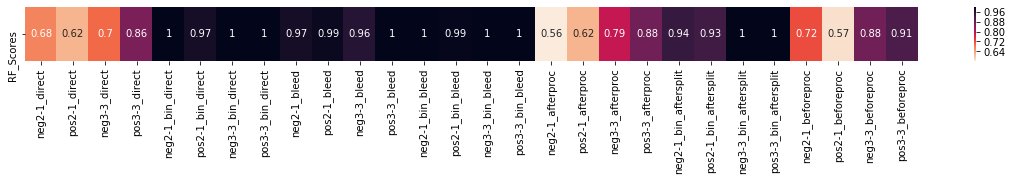

In [147]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(Scores_H, annot=True, ax=ax, cmap = sns.cm.rocket_r, yticklabels = ['RF_Scores'])

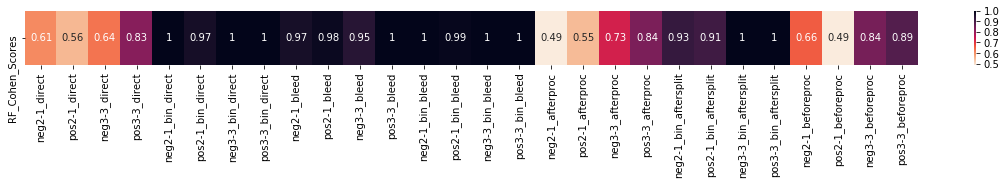

In [148]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(CKS_H, annot=True, ax=ax, cmap = sns.cm.rocket_r, yticklabels = ['RF_Cohen_Scores'])

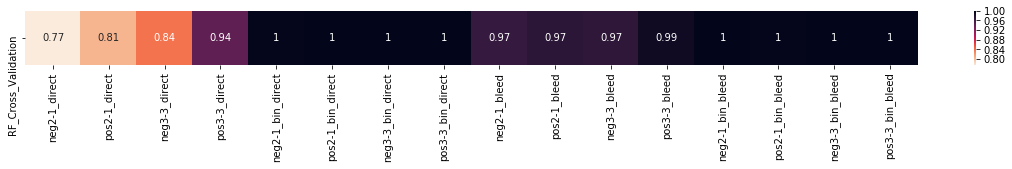

In [149]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(Cross_Val_H, annot=True, ax=ax, cmap = sns.cm.rocket_r, yticklabels = ['RF_Cross_Validation'])

## Discussion of day 6/11/2019 and forward not present here - Incomplete

### Results summary of dendrograms made with the heatmaps

- Results similar for all 3 methods of calculating the correlation between different hierarchical clusterings.
- 2 big clusters formed based on the similarity of the correlations between different hierarchical clusterings (made with different distance metrics.
- One cluster with the binary measures: hamming, sokalmichener and rogerstanimoto; the other with: dice, jaccard, sokalsneath, yule, russellrao, kulsinski (this last two seem farther away than the rest).
- There is some difference between negative and positive datasets, however this difference isn't too big.
- Note that almost all of the correlation coefficients between groups are positive so most of them tend to show the same "major" trends in the data. However, after Pareto Scaling correction, the correlation values seem lower and there is a greater number of negative correlations (even if really small).

##### Comparison with Euclidean Distances
- Pareto Scaled data makes sample proximity based on euclidean distances closer to hamming, sokalmichener and rogerstanimoto binary distances.
- Normalized by reference features before Pareto Scaling data makes sample proximity based on euclidean distances be closer to all other binary measures: dice, jaccard, sokalsneath, yule, (russellrao, kulsinski). The positive dataset is still considerably separated even from its closest binary measures. Normalization also seems to prevent early separation of varieties with low number of peaks (samples CHT, SB and CFN). 
- glog transformation (currently only log transformation*2 - lacks glog optimization algorithm - to do (adding)) after normalization (and before Pareto Scaling) on the data seems becomes closer to the original Pareto Scaled data in the dendrograms for the positive dataset while it stays in the same cluster (as the normalized negative dataset) for the negative dataset. Also lambda seems to have a very small effect on the results (see MetAnalyst_Example.ipynb as an example).
- glog transformation without normalization data's results are very close to the glog transformation after normalization that were mentioned before and, as such, they aren't shown in the dendrogram to facilitate analysis.
- (One difference that can be one of the major reasons behind this 2 cluster groups and euclidean metrics shifting based on the data procesing may be the following: if the first "cluster separation" in each dendrogram starts with separating the varieties CHT, SB and CFN or not (and normally separating TRI, REG, RU) from the rest of the group.)
- Overall, the results seem difficult to interpret about which binary measure is closer to the results given using the conventional Euclidean Distances since the latter's result depend on the data processing that is made.
- Euclidean distances also don't allow to separate the different varieties individually very effectively and only separate them in "cluster of varieties" that are closer to eachother.

##### Comparison between the different peak alignments made and analysed with Euclidean Distances
- The two peak alignments seem to produce very similar results.
- The groups of the two peak alignments that suffer the same kind of data processing often "cluster" with each other (are closer to each other) than any other group in all 3 correlation metrics.
- Other peak alignments may change the previous results slightly but never too much (to alter the conclusions had). Example: requiring features to appear in 1/3 (13) of the samples: negative dataset without transformation is distant (close to euc_NP_pos as seen above) but the rest of results have the same conclusions - the positive dataset with this peak alignment is really close to the first positive dataset used here. 

##### Checking if the data processing gives similar results to the one made in MetaboAnalyst
- Check Jupyter Notebook MetAnalyst_Example.ipynb.

##### Checking if the data processing gives similar results without CHT, SB and CFN varieties
- Correlation values in general higher without those varieties.
- Dendrogram of individual distance metrics seem to be able to separate varieties better (not in all cases though).
- Hierarchical clustering of the correlation coeficients of dendrograms need more analysis however it seems like euclidean distances seem to be in general closer to hamming, sokalmichener, rogerstanimoto and yule binary measures than others (specially in the cophenetic correlation coefficients). The normalized positive dataset is really distant from other euclidean distances and most binary distances apart from kulsinki and russellrao that tend to have slightly negative correlations with other distances.
- I don't know where and if I should put these results.


log menos erros, auqele m+etodo de análsie de avaliação rudimentar, importância do non bias 1-6 e 1-13 falar do objetivo do caso espeical do 2-1, dizer o mérito das mediads binárias neste caso exemplo. MEDIDAS MAIS PRóximas nos dendrogramas, soma das tabelas tmb, falar do problema do especial do 2-1.

#### Some functions that might be useful in the future

In [150]:
def reord_samples(DisorderedSpectra, OrderedSpectra):
    """Make a spectra have the same sample order than another.
    
       DisorderedSpectra, OrderedSpectra: AlignedSpectra objects (from metabolinks).
       
       Returns: AlignedSpectra object (from metabolinks); DisorderedSpectra ordered by the samples of Ordered Spectra.
       """
    ordered = DisorderedSpectra.data[OrderedSpectra.sample_names] 
    Reordered = AlignedSpectra(ordered, sample_names=OrderedSpectra.sample_names, labels=OrderedSpectra.sample_names.labels)
    return Reordered

In [151]:
#Needs - scipy.cluster.hierarchy as hier 
def Coph_Trans(Z, zdist):
    """Transforms the cophenet distances given by the function scypy.hierarchy.cophenet into a triangular matrix.
    
       Z: 2-D array; the return of the linkage function in scypy.stats.hierarchy.
       zdist: ndarray; the return of the distance function in scypy.spatial.distance.
       
       Returns: cophenetic correlation distance and a cophenetic distance matrix.
    """
    
    #Z2 = scipy.cluster.hierarchy.cophenet(Z, zdist)
    Z2 = hier.cophenet(Z, zdist)
    CCM = np.zeros((len(Z)+1, len(Z)+1))
    n = 0
    for i in range(0,len(Z)):
        j = i + 1
        while j < len(Z)+1:
            CCM[j,i] = Z2[1][n]
            j = j + 1
            n = n + 1
    return Z2[0], CCM

In [152]:
def Dendrogram_prep(Spectra, minsample = 0, metric = 'euclidean', method = 'average'):
    """Hierarchical clustering of a spectra (feature removal, missing value imputation, Pareto scaling and linkage algorithm).
    
       Spectra: AlignedSpectra object (from metabolinks).
       minsample: scalar, optional; number between 0 and 1, minsample*100 is the minimum % of samples where the feature must
    be present in order to not be removed.
       metric: string, optional; type of distance metrics to use (distances betweens samples). Distance metrics: {'euclidean', 
    'dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 'yule', 'kulsinski', 'russellrao'}.
       method: string, optional; type of linkage algorithm to use. Types of methods: {'ward', 'average', 'centroid', 'single',
    'complete', 'weighted', 'median'}.
       
       Returns: (ndarray, ndarray); hierarchical clustering encoded as a linkage matrix, respective condensed distance matrix.
    """
    
    binary = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 'yule', 'kulsinski', 'russellrao')
    if metric in binary:
        Bool = df_to_bool(Spectra.data)
        Dist = dist.pdist(Bool.T, metric = metric)
    else:
        Imputated = sca.NaN_Imputation(Spectra, minsample)
        Scaled = sca.ParetoScal(Imputated)
        Dist = dist.pdist(Scaled.data.T, metric = metric)
    
    Z = hier.linkage(Dist, method = method)
    Data = (Z, Dist)
    return Data